# INITIAL DATA EXPLORATION

> What is conducted in this notebook?
1. Shape of the dataset is studied, and the columns are seen in details. 
2. Data description and Summary Statistics
3. Normalization of data to support EDA analysis
4. Checking for NULL and Duplicates
5. EDA 
6. Dropping of columns which are not necessary for model building
7. Saving final dataframe to csv.

In [585]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter("ignore")
sns.set_style('darkgrid')
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import (CountVectorizer, TfidfVectorizer, HashingVectorizer)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.preprocessing import StandardScaler



## LODING DATASET 

In [586]:

file_path = r"C:\Data_Science\Mini Project\Capston Project\Capston_IOD_Project\DATABASE files\amazon_reviews_2019.csv"

# Try loading the CSV file with a different encoding
try:
    data = pd.read_csv(file_path, encoding='ISO-8859-1')  # or use 'cp1252'
    #REMOVE MAX
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
except Exception as e:
    print("Error loading file:", e)


## SHAPE OF THE DATA AND ITS ATTRIBUTES

In [587]:
#TOTAL ROWS AND COLUMNS
n_reviews, n_attributes = data.shape
print('Total Reviews: ',n_reviews)
print('Total Attributes: ',n_attributes)

Total Reviews:  2501
Total Attributes:  32


> There are in total of 2.5k reviews within this dataset, which makes it to be a valid dataset since the records are more than 1k, thus suitable for analysis.

> However, it is to be noted that there are in total of 32 columns within this dataset, which is far more than what is required for this project. These columns need to be taken a deeper look for feature selection.

In [588]:
#INFORMATION ON THE LOADED CSV FILE. COVERS COLUMN NAMES, TOTAL ROWS AND COLUMS, DATA TYPES AND THE MEMORY USAGE.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   report_date             2501 non-null   object 
 1   online_store            2501 non-null   object 
 2   upc                     2501 non-null   float64
 3   retailer_product_code   2501 non-null   object 
 4   brand                   2501 non-null   object 
 5   category                2501 non-null   object 
 6   sub_category            2501 non-null   object 
 7   product_description     2501 non-null   object 
 8   review_date             2501 non-null   object 
 9   review_rating           2501 non-null   int64  
 10  review_title            2396 non-null   object 
 11  review_text             2501 non-null   object 
 12  is_competitor           2501 non-null   int64  
 13  manufacturer            2501 non-null   object 
 14  market                  2501 non-null   

In [589]:
#DISPLAY DATAFRAME
data.head()

,report_date,online_store,upc,retailer_product_code,brand,category,sub_category,product_description,review_date,review_rating,review_title,review_text,is_competitor,manufacturer,market,matched_keywords,time_of_publication,url,review_type,parent_review,manufacturers_response,dimension1,dimension2,dimension3,dimension4,dimension5,dimension6,dimension7,dimension8,verified_purchase,helpful_review_count,review_hash_id
0,1/02/2019,FRESHAMAZON,8.720000e+12,B0142CI6FC,Dove Men+Care,Personal Care,Deos,Dove Men+Care Extra Fresh Anti-perspirant Deod...,1/01/2019,5,Dove Mens + Deodorant,"As you get older, you know what you like and w...",0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/RE...,Organic,Child,NaN,Deos,Male Anti-Perspirant Deodorant,COTC Male Anti-Perspirant Deodorant,NaN,NaN,NaN,COTC Male Anti-Perspirant Deodorant,Core of the Core,True,0,3f129b02-ea76-0323-bd59-235d97a4f83f
1,1/03/2019,FRESHAMAZON,5.000000e+12,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,1/02/2019,5,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/R1...,Organic,Child,NaN,Savoury,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,d7f3b9aa-e8b3-626d-683b-374e201c8315
2,1/03/2019,FRESHAMAZON,5.000000e+12,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,1/02/2019,4,Vitamin B12.,Excellent,0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/RD...,Organic,Child,NaN,Savoury,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,e58a523d-0155-a366-f107-7ac6817ac3b7
3,1/03/2019,FRESHAMAZON,8.710000e+12,B014DFKELC,Knorr,Foods,Savoury,Knorr Beef Stock Pot 8 x 28g,1/02/2019,5,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/R2...,Organic,Parent,NaN,Savoury,Beef Stock/Pots/Cubes/Extract/Liquid/Concentrated,Stock Pots,NaN,NaN,NaN,Stock Pots,Core of the Core,True,0,aaa9bb87-4f99-bb89-65cb-3b400ebb45c0
4,1/03/2019,FRESHAMAZON,8.720000e+12,B014G37I7E,Cif,Homecare,HHC,Cif Citrus Bathroom Mousse 500ml,1/02/2019,5,Very handy,Does what is says it does,0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/RJ...,Organic,Parent,NaN,HHC,Bathroom Mousse,Bathroom Mousse,NaN,NaN,NaN,NaN,Core of the Core,False,0,48c71b34-d7fe-5e90-51dd-239e153fb0ae


## DATA DESCRIPTION


> We can gain a better grasp of the dataset by digging deeper into the columns. The columns are described in detail below.

1. report_date: Date when the data was extracted.
                Most records seem to be from 2019.
2. online_store: The name of the online store where the reviews were posted.
3. upc (Universal Product Code):A 12-digit numeric barcode used to identify trade items globally.
4. retailer_product_code:  Product identifier from the retailer's side.
5. brand: The brand of the product being reviewed.
6. category: General product category (e.g., food, electronics).
7. sub_category: A more specific product category under the general category (e.g., savoury under food).
8. product_description: A detailed description of the product.
9. review_date: The date when the review was posted.
10. review_rating: ating provided by the reviewer, on a scale from 1 (very poor) to 5 (excellent).
11. review_title: The title of the review.
12. review_text: The full text of the review, often containing feedback on the product.
13. is_competitor: Whether the product is considered a competitor's product. Requires further analysis for clarity.
14. manufacturer: the manufacturer of the product.
15. market:The geographical location or market where the products and stores are situated.
16. matched_keywords: No data available (NULL values).
17. time_of_publication: No data available (NULL values).
18. url: URL link to the original review.
19. review_type: Indicates the type of review. This column requires additional investigation for clarity.
20. parent_review: Indicates whether the review is a parent or child review in a discussion thread.
21. manufacturers_response:Response from the manufacturer to the review, if any.
22. dimension 1 - 8:Miscellaneous product-related data, but several missing values exist, which need verification.
23. verified_purchase: Indicates if the review is from a verified purchase.
24. helpful_review_count: The number of individuals who found the review helpful.
25. review_hash_id: A unique identifier for each review.

## SUMMARY STATISTICS 

> Summary statistics help us understand the dataset's overall structure. For numerical columns, they provide insights into max/min values, averages, and the presence of null values. For categorical columns, they reveal unique values and their frequencies, helping us identify patterns and potential issues like missing data.

In [590]:
#NON-OBJECTS
data.describe()

,upc,review_rating,is_competitor,matched_keywords,time_of_publication,manufacturers_response,dimension4,dimension5,dimension6,helpful_review_count
count,2.501000e+03,2501.000000,2501.0,0.0,0.0,0.0,0.0,0.0,0.0,2501.000000
mean,7.631221e+12,4.456218,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.231507
std,2.108136e+12,1.108595,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.953930
min,4.218266e+07,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,8.710000e+12,4.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,8.710000e+12,5.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,8.710000e+12,5.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
max,8.720000e+12,5.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.000000


1. Average Rating: 4.46 (positive reviews).
2. Helpful Count: Average is 0.23 (most reviews not marked as helpful).
3. UPC: Unique identifier, not relevant for analysis.
4. Competitor Flag: All values are 0 (no competitors flagged).
5. .Null Columns: matched_keywords, time_of_publication, manufacturers_response, and dimension4-6 are entirely NULL.




In [591]:
#OBJECTS
data.describe(include=object)

,report_date,online_store,retailer_product_code,brand,category,sub_category,product_description,review_date,review_title,review_text,manufacturer,market,url,review_type,parent_review,dimension1,dimension2,dimension3,dimension7,dimension8,review_hash_id
count,2501,2501,2501,2501,2501,2501,2501,2501,2396,2501,2501,2501,1654,2501,2501,2501,2501,2310,2499,2501,2501
unique,133,9,367,35,4,16,219,144,1243,1622,1,1,1571,2,2,16,106,94,15,1,2501
top,5/26/2019,AMAZON,B077YLQ2R1,Comfort,Personal Care,Laundry,Simple x Little Mix Micellar Cleansing Wipes 2...,2/19/2019,Great value,Good,Unilever Global,UK,https://www.sainsburys.co.uk/shop/gb/groceries...,Organic,Parent,Laundry,COTC Fabric Conditioner,COTC Fabric Conditioner,Retailer Core of the Core,Core of the Core,3f129b02-ea76-0323-bd59-235d97a4f83f
freq,217,1102,97,480,1182,993,108,70,48,25,2501,2501,52,1936,1800,993,326,276,1281,2501,1


1. Stores: There are 9 stores, with most reviews coming from Amazon. All stores are major outlets in the UK.
2. Category: Most data is from the Personal Care category, specifically under Laundry products from the Comfort brand. 
3. Positive Reviews: Common phrases in positive reviews include "Good" and "great value," indicating similar wording in positive feedback.
4. Manufacturer: All products are from a single manufacturer, Unilever Global.
5. Market: The dataset is focused entirely on the UK.
6. Review Types: There are two review types, mostly organic and parent reviews.
7. Dimensions: Dimensions 1-8 provide additional product information, mostly related to laundry items.
8. Review Hash ID: This can be ignored as it's a unique identifier.

In [592]:
data["review_type"].value_counts(normalize=True).to_frame()

,proportion
review_type,
Organic,0.77409
Syndicated,0.22591



1. Organic Reviews: Comprise 77% of the dataset, indicating a strong base of genuine customer feedback.
2. Syndicated Reviews: Account for only 22%, representing reviews shared across multiple platforms for better accessibility.

In [593]:
data["parent_review"].value_counts(normalize=True).to_frame()

,proportion
parent_review,
Parent,0.719712
Child,0.280288


Most of the reviews are said to be parent reviews. Upon further research, it is unclear what this stands for, and hence might be dropped due to is ambiguity.

In [594]:
data["review_date"].value_counts().to_frame()

,count
review_date,
2/19/2019,70
1/26/2019,49
2/01/2019,47
2/20/2019,46
5/01/2019,40
2/26/2019,39
1/31/2019,38
2/18/2019,36
1/14/2019,36


In [595]:
data["report_date"].value_counts().to_frame()

,count
report_date,
5/26/2019,217
2/28/2019,201
5/27/2019,134
3/25/2019,122
3/21/2019,81
2/22/2019,56
5/23/2019,55
3/22/2019,50
2/08/2019,39


The years of the reviews  on this dataset consists of 2019 only.

In [596]:
data.groupby('category')['sub_category'].value_counts().sort_index(ascending=True).to_frame()

count
category      sub_category                        
Foods         Dressings                         36
              Ice Cream                         39
              Other Foods                       16
              Savoury                          100
Homecare      HHC                               27
              Household Care                    30
              Laundry                          993
Personal Care Deodorants & Fragrances          125
              Deos                             100
              Hair                             108
              Hair Care                         77
              Personal Care                     22
              Skin Care                        476
              Skin Cleansing                   274
Refreshment   Ice Cream                         70
              Tea                                3
              Tea and Soy & Fruit Beverages      5

The sub-categories, grouped by the categories accordingly. 

> Standardizing: Similar sub-categories like "Deos" and "Deodorants & Fragrances," "Hair" and "Hair Care," and "Ice Cream" across different categories are merged. 

> Grouped Summary: If you need, you can group the data based on category and sub_category to sum up the counts and avoid duplication.

needs to be handled since this can be useful for further EDA analysis

In [597]:
#CHANGING THE CATEGORIES AND SUB-CATEGORIES
data.loc[data.sub_category == "Ice Cream", "category"] = "Refreshment"

In [598]:
data.loc[data.sub_category == "HHC", "sub_category"] = "Household Care"

In [599]:
data.loc[data.sub_category == "Deos", "sub_category"] = "Deodorants & Fragrances"

In [600]:
data.loc[data.sub_category == "Tea", "sub_category"] = "Tea and Soy & Fruit Beverages"

In [601]:
data.loc[data.sub_category == "Hair Care", "sub_category"] = "Hair"

In [602]:
data.groupby('category')['sub_category'].value_counts().sort_index(ascending=True).to_frame()

count
category      sub_category                        
Foods         Dressings                         36
              Other Foods                       16
              Savoury                          100
Homecare      Household Care                    57
              Laundry                          993
Personal Care Deodorants & Fragrances          225
              Hair                             185
              Personal Care                     22
              Skin Care                        476
              Skin Cleansing                   274
Refreshment   Ice Cream                        109
              Tea and Soy & Fruit Beverages      8

Everything is now sorted and hence can be used for EDA analysis accordingly.

In [603]:
data["online_store"].value_counts().to_frame()

,count
online_store,
AMAZON,1102
AMAZONPRIMEPANTRY,389
BOOTS,378
SUPERDRUG,188
OCADO,168
SAINSBURYS,123
ASDA,109
FRESHAMAZON,40
MORRISONS,4


The majority of the reviews in this dataset come from the AMAZON store, and most stores are located in the UK.

>Helpful Reviews: A large portion of the reviews hasn't received any helpful votes, with those that do being awarded very few. This could potentially skew the overall insights, making it difficult to identify fake reviews effectively based solely on helpful review counts.

## CHECKING FOR NULL AND DUPLICATED VALUES

In [604]:
#CHECKING THE NUMBER OF NULL VALUES ACROSS THE DATASET
data.isnull().sum()

report_date                  0
online_store                 0
upc                          0
retailer_product_code        0
brand                        0
category                     0
sub_category                 0
product_description          0
review_date                  0
review_rating                0
review_title               105
review_text                  0
is_competitor                0
manufacturer                 0
market                       0
matched_keywords          2501
time_of_publication       2501
url                        847
review_type                  0
parent_review                0
manufacturers_response    2501
dimension1                   0
dimension2                   0
dimension3                 191
dimension4                2501
dimension5                2501
dimension6                2501
dimension7                   2
dimension8                   0
verified_purchase            0
helpful_review_count         0
review_hash_id               0
dtype: i


The dataset contains several NULL values that need to be addressed:

1. review_title has 105 NULL values, a small minority compared to over 2,000 records.
2. URL has 800+ missing values, but can be ignored as it's not essential to the project.
3.matched_keywords, time_of_publication, manufacturers_response, dimension4, dimension5, and dimension6 contain no values and will be dropped entirely
4. dimension7 has only 2 missing values and provides extra product information, so it can be evaluated based on its importance.

**Key columns for analysis—review_rating, review_text, and verified_purchase—have no missing values, which is ideal for the project’s focus.**

In [605]:
#DISPLAYS THE NUMBER OF DUPLICATED VALUES
dup = data.duplicated().sum()
print("Number of duplicates in dataset: ", dup)

Number of duplicates in dataset:  0


### TEXTUAL ATTRIBUTES

In [606]:
#TEXTUAL ATTRIBUTES
cols = ['review_date','review_title', 'review_text','review_rating','verified_purchase']
textual_attributes = data[cols]
pd.DataFrame(textual_attributes).head()

,review_date,review_title,review_text,review_rating,verified_purchase
0,1/01/2019,Dove Mens + Deodorant,"As you get older, you know what you like and w...",5,True
1,1/02/2019,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,5,True
2,1/02/2019,Vitamin B12.,Excellent,4,True
3,1/02/2019,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,5,True
4,1/02/2019,Very handy,Does what is says it does,5,False



> The dataset includes textual attributes that are complete (no NULL values). These attributes can be leveraged to analyze the textual context of the reviews. By doing so, we can gain deeper insights into the review data, which will prove useful when building a classifier. 

> By focusing on linguistic features of the review text, we can better approach the problem of identifying fake vs genuine reviews

> The textual attributes will be integral to the EDA process, helping uncover patterns in the language used in reviews, which can contribute to more accurate model building.

In [607]:
#DROP AFOREMENTIONED COLUMNS
data.drop(['matched_keywords', 'time_of_publication'
         ,'manufacturers_response', 'dimension4',
         'dimension5', 'dimension6', 
         'is_competitor', 'helpful_review_count',
        'report_date','online_store','brand',
         'category','sub_category', 'market',
        'upc', 'retailer_product_code', 'review_hash_id', 
         'url','product_description', 'parent_review', 
         'review_type', 'manufacturer', 'dimension1', 
         'dimension2','dimension3','dimension4',
         'dimension5', 'dimension7', 
         'dimension8'], axis=1, inplace=True)
data.head() #UPDATED DATAFRAME

,review_date,review_rating,review_title,review_text,verified_purchase
0,1/01/2019,5,Dove Mens + Deodorant,"As you get older, you know what you like and w...",True
1,1/02/2019,5,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,True
2,1/02/2019,4,Vitamin B12.,Excellent,True
3,1/02/2019,5,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,True
4,1/02/2019,5,Very handy,Does what is says it does,False


In [608]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2501 entries, 0 to 2500
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   review_date        2501 non-null   object
 1   review_rating      2501 non-null   int64 
 2   review_title       2396 non-null   object
 3   review_text        2501 non-null   object
 4   verified_purchase  2501 non-null   bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 80.7+ KB


## RE-CHECK NULL AND DUPLICATES

In [609]:
#CHECK TOTAL DUPLICATE OCCURENCES
dup = data.duplicated().sum()
print("Number of duplicates in dataset: ", dup)

Number of duplicates in dataset:  783


In [610]:
data = data.drop_duplicates().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   review_date        1718 non-null   object
 1   review_rating      1718 non-null   int64 
 2   review_title       1650 non-null   object
 3   review_text        1718 non-null   object
 4   verified_purchase  1718 non-null   bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 55.5+ KB


### NULL Values
re-checking for NULL values to check if any needs to be filled up or dropped.

In [611]:
data.isnull().sum()

review_date           0
review_rating         0
review_title         68
review_text           0
verified_purchase     0
dtype: int64

In [612]:
#DROP review_title
data.drop(["review_title","review_date"], axis=1, 
        inplace=True)
data.head()

,review_rating,review_text,verified_purchase
0,5,"As you get older, you know what you like and w...",True
1,5,Three gigantic marmite jars that will last pro...,True
2,4,Excellent,True
3,5,A great flavour top - up for slow cooking.,True
4,5,Does what is says it does,False


>Titles are actually not mandatory in amazon reviews, and hence there are multiple missing values within the review_title. For this project, we are not going to be utlizing this dataset, and hence it is going to be dropped.

In [613]:
#SAVING UPDATED DATAFRAME AS .csv FILE
data.to_csv('C:/Data_Science/Mini Project/Capston Project/Capston_IOD_Project/DATABASE files/updated_data.csv')

## EDA ON THE REVIEW TEXT

We have conducted an in-depth review surrounding the background of the Amazon dataset, and this time the ``review_text`` itself is going to be taken a further look. To aid in our pre-processing, certain columns will be added to understand certain instances the sentences have. Those include the counts of:
1. Word
2. Characters (with spaces)
3. Stopwords
4. Punctuations
5. Uppercase characters

After the columns are added, necessary ``summary statistics`` will be conducted to get an idea on how the pre-processing will take place.

In [802]:
file_path = r"C:\Data_Science\Mini Project\Capston Project\Capston_IOD_Project\DATABASE files\amazon_reviews_2019.csv"
update_file_path = r"C:\Data_Science\Mini Project\Capston Project\Capston_IOD_Project\DATABASE files\updated_data.csv"
# Try loading the CSV file with a different encoding

try:
    data = pd.read_csv(file_path, encoding='ISO-8859-1')  # or use 'cp1252'
    review_data = pd.read_csv(update_file_path, encoding='ISO-8859-1')  # or use 'cp1252'
    #REMOVE MAX
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
except Exception as e:
    print("Error loading file:", e)

In [803]:
# Download stopwords if not already downloaded
nltk.download('stopwords')

# Data Cleaning
review_data.drop_duplicates(inplace=True)  # Remove duplicate reviews

# Calculate additional metrics
review_data['total_words'] = review_data['review_text'].apply(lambda x: len(x.split()))  # Count total words
review_data['total_characters'] = review_data['review_text'].apply(lambda x: len(x))  # Count total characters
review_data['total_stopwords'] = review_data['review_text'].apply(lambda x: len([word for word in x.split() if word.lower() in stopwords.words('english')]))  # Count stopwords
review_data['total_punctuations'] = review_data['review_text'].apply(lambda x: len([char for char in x if char in '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~']))  # Count punctuations
review_data['total_uppercases'] = review_data['review_text'].apply(lambda x: len([char for char in x if char.isupper()]))  # Count uppercases

# Display the first few rows of the dataset with new columns
print(data.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  report_date online_store           upc retailer_product_code          brand  \
0   1/02/2019  FRESHAMAZON  8.720000e+12            B0142CI6FC  Dove Men+Care   
1   1/03/2019  FRESHAMAZON  5.000000e+12            B014DFNNRY        Marmite   
2   1/03/2019  FRESHAMAZON  5.000000e+12            B014DFNNRY        Marmite   
3   1/03/2019  FRESHAMAZON  8.710000e+12            B014DFKELC          Knorr   
4   1/03/2019  FRESHAMAZON  8.720000e+12            B014G37I7E            Cif   

        category sub_category  \
0  Personal Care         Deos   
1          Foods      Savoury   
2          Foods      Savoury   
3          Foods      Savoury   
4       Homecare          HHC   

                                 product_description review_date  \
0  Dove Men+Care Extra Fresh Anti-perspirant Deod...   1/01/2019   
1                 Marmite  Spread Yeast Extract 500g   1/02/2019   
2                 Marmite  Spread Yeast Extract 500g   1/02/2019   
3                      Knorr  Beef Stock P

In [804]:
review_data.head() #UPDATED 

,Unnamed: 0,review_rating,review_text,verified_purchase,total_words,total_characters,total_stopwords,total_punctuations,total_uppercases
0,0,5,"As you get older, you know what you like and w...",True,39,202,19,7,5
1,1,5,Three gigantic marmite jars that will last pro...,True,30,175,9,6,4
2,2,4,Excellent,True,1,9,0,0,1
3,3,5,A great flavour top - up for slow cooking.,True,9,42,3,2,1
4,4,5,Does what is says it does,False,6,25,5,0,1


In [805]:
#DROPPING UNWANTED COLUMN
review_data.drop(['Unnamed: 0'], axis=1, inplace=True)

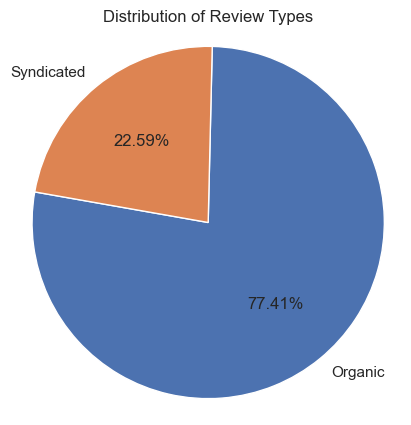


Example Records:


,report_date,online_store,upc,retailer_product_code,brand,category,sub_category,product_description,review_date,review_rating,review_title,review_text,is_competitor,manufacturer,market,matched_keywords,time_of_publication,url,review_type,parent_review,manufacturers_response,dimension1,dimension2,dimension3,dimension4,dimension5,dimension6,dimension7,dimension8,verified_purchase,helpful_review_count,review_hash_id
0,1/02/2019,FRESHAMAZON,8.720000e+12,B0142CI6FC,Dove Men+Care,Personal Care,Deos,Dove Men+Care Extra Fresh Anti-perspirant Deod...,1/01/2019,5,Dove Mens + Deodorant,"As you get older, you know what you like and w...",0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/RE...,Organic,Child,NaN,Deos,Male Anti-Perspirant Deodorant,COTC Male Anti-Perspirant Deodorant,NaN,NaN,NaN,COTC Male Anti-Perspirant Deodorant,Core of the Core,True,0,3f129b02-ea76-0323-bd59-235d97a4f83f
1,1/03/2019,FRESHAMAZON,5.000000e+12,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,1/02/2019,5,Great for a marmite lover!,Three gigantic marmite jars that will last pro...,0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/R1...,Organic,Child,NaN,Savoury,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,d7f3b9aa-e8b3-626d-683b-374e201c8315
2,1/03/2019,FRESHAMAZON,5.000000e+12,B014DFNNRY,Marmite,Foods,Savoury,Marmite Spread Yeast Extract 500g,1/02/2019,4,Vitamin B12.,Excellent,0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/RD...,Organic,Child,NaN,Savoury,COTC Yeast Extract,COTC Yeast Extract,NaN,NaN,NaN,COTC Yeast Extract,Core of the Core,True,0,e58a523d-0155-a366-f107-7ac6817ac3b7
3,1/03/2019,FRESHAMAZON,8.710000e+12,B014DFKELC,Knorr,Foods,Savoury,Knorr Beef Stock Pot 8 x 28g,1/02/2019,5,A Very Handy Flavour Top - Up to Keep In The C...,A great flavour top - up for slow cooking.,0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/R2...,Organic,Parent,NaN,Savoury,Beef Stock/Pots/Cubes/Extract/Liquid/Concentrated,Stock Pots,NaN,NaN,NaN,Stock Pots,Core of the Core,True,0,aaa9bb87-4f99-bb89-65cb-3b400ebb45c0
4,1/03/2019,FRESHAMAZON,8.720000e+12,B014G37I7E,Cif,Homecare,HHC,Cif Citrus Bathroom Mousse 500ml,1/02/2019,5,Very handy,Does what is says it does,0,Unilever Global,UK,NaN,NaN,http://www.amazon.co.uk/gp/customer-reviews/RJ...,Organic,Parent,NaN,HHC,Bathroom Mousse,Bathroom Mousse,NaN,NaN,NaN,NaN,Core of the Core,False,0,48c71b34-d7fe-5e90-51dd-239e153fb0ae


In [806]:
# Pie chart for review types
sns.set_style('darkgrid')
review_counts = data['review_type'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(review_counts, labels=review_counts.index, autopct='%1.2f%%', startangle=170)
plt.title('Distribution of Review Types')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

# Display example records
print("\nExample Records:")
data.head()

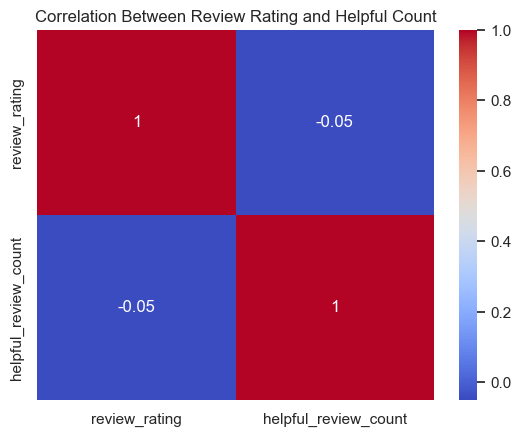

In [619]:
# Correlation matrix
correlation = data[['review_rating', 'helpful_review_count']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Between Review Rating and Helpful Count')
plt.show()

### Summary Statistics

In [620]:
review_data.describe()

,review_rating,total_words,total_characters,total_stopwords,total_punctuations,total_uppercases
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000
mean,4.441793,33.199069,177.890570,15.210710,4.434226,3.841676
std,1.123083,35.258955,189.818467,17.383135,5.177685,4.319838
min,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000
25%,4.000000,7.000000,41.000000,2.000000,1.000000,1.000000
50%,5.000000,21.000000,114.500000,9.000000,3.000000,3.000000
75%,5.000000,50.000000,268.750000,24.000000,7.000000,5.000000
max,5.000000,287.000000,1624.000000,138.000000,42.000000,54.000000


> Readings
1. The mean characters within the entire dataset happens to be at 177, averaging at about 33 words per review.
2. On average, there are about 9 stop words, and within the sentences there are about 4 punctuations.
3. As for the uppercase letters, from the mean value it is safe to assume that most of the reviews utlized their uppercases as Sentence Case.

In [621]:
review_data.groupby("verified_purchase").describe().T

verified_purchase               False        True 
review_rating      count   900.000000   818.000000
                   mean      4.315556     4.580685
                   std       1.187805     1.030249
                   min       1.000000     1.000000
                   25%       4.000000     5.000000
                   50%       5.000000     5.000000
                   75%       5.000000     5.000000
                   max       5.000000     5.000000
total_words        count   900.000000   818.000000
                   mean     50.273333    14.413203
                   std      36.865217    21.041613
                   min       1.000000     1.000000
                   25%      23.000000     3.000000
                   50%      48.000000     8.000000
                   75%      63.000000    17.000000
                   max     282.000000   287.000000
total_characters   count   900.000000   818.000000
                   mean    268.920000    77.735941
                   std     199.070130   113.775095
                   min       4.000000     2.000000
                   25%     126.000000    18.000000
                   50%     247.000000    44.500000
                   75%     335.000000    90.750000
                   max    1541.000000  1624.000000
total_stopwords    count   900.000000   818.000000
                   mean     23.515556     6.073350
                   std      18.337850    10.268703
                   min       0.000000     0.000000
                   25%      10.000000     1.000000
                   50%      21.000000     3.000000
                   75%      31.000000     7.000000
                   max     138.000000   136.000000
total_punctuations count   900.000000   818.000000
                   mean      6.837778     1.789731
                   std       5.607709     2.893422
                   min       0.000000     0.000000
                   25%       3.000000     0.000000
                   50%       6.000000     1.000000
                   75%       9.000000     3.000000
                   max      42.000000    28.000000
total_uppercases   count   900.000000   818.000000
                   mean      5.245556     2.297066
                   std       4.548433     3.448664
                   min       0.000000     0.000000
                   25%       2.000000     1.000000
                   50%       4.500000     1.000000
                   75%       7.000000     3.000000
                   max      54.000000    52.000000

> Findings
1. Review Length: False reviews are longer, averaging 50 words and 268 characters, while True reviews average 14 words and 77 characters.
2. Stopwords Usage: False reviews contain more stopwords, indicating possible filler content.
3. Punctuation and Case: False reviews have more punctuations and uppercase characters, suggesting they use longer, more complex sentences compared to True reviews.


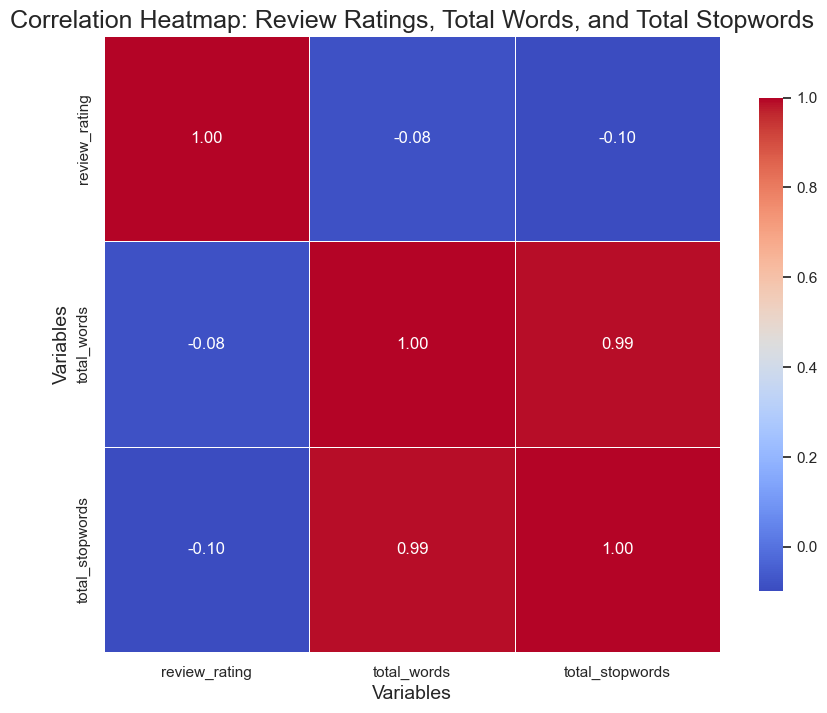

In [622]:
# Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))

# Calculate the correlation matrix for the specified columns
correlation_matrix = review_data[['review_rating', 'total_words', 'total_stopwords']].corr()

# Create the heatmap
sns.heatmap(correlation_matrix, 
            annot=True,                   # Annotate cells with correlation values
            cmap='coolwarm',              # Color map for the heatmap
            fmt='.2f',                    # Format for the annotation text
            square=True,                  # Make cells square-shaped
            linewidths=.5,                # Add lines between cells
            cbar_kws={"shrink": .8})      # Adjust color bar size

# Title and labels
plt.title('Correlation Heatmap: Review Ratings, Total Words, and Total Stopwords', fontsize=18)
plt.xlabel('Variables', fontsize=14)
plt.ylabel('Variables', fontsize=14)

# Display the plot
plt.show()

In [623]:
colors = ['#4c72b0', '#55a868']

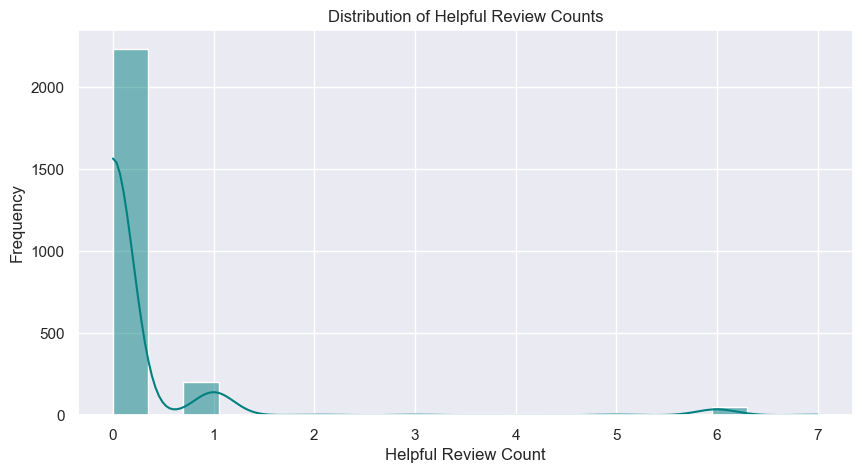

In [624]:
# Visualizing the distribution of helpful review counts
plt.figure(figsize=(10, 5))
sns.histplot(data['helpful_review_count'], bins=20, kde=True, color='teal')
plt.title('Distribution of Helpful Review Counts')
plt.xlabel('Helpful Review Count')
plt.ylabel('Frequency')
plt.show()

> In a typical scenario, the helpful_review_count column helps determine which reviews assist users in making purchase decisions. However, in this dataset, most reviews show a count of zero, with only a few having minimal values. This lack of useful data could skew our ability to identify fake versus genuine reviews. To mitigate bias in our model building, we will exclude this column from our analysis.

>We're excluding the helpful_review_count feature because it mostly contains zeros, which won't provide meaningful insights. This decision will help enhance the model's accuracy in identifying genuine reviews

Text(0.5, 1.0, 'Count of Product Categories')

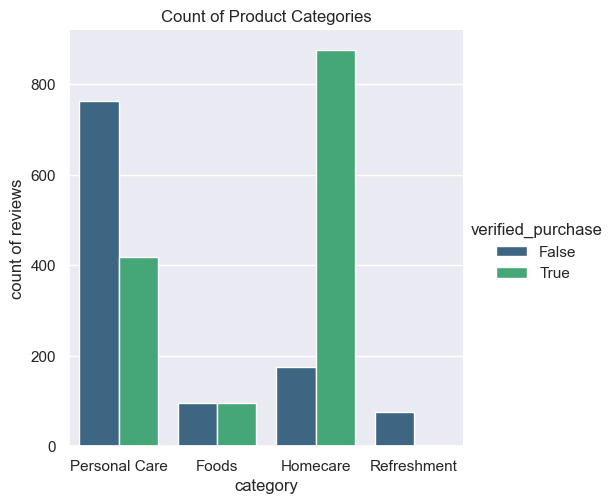

In [625]:

sns.catplot(x='category', kind='count', hue='verified_purchase', palette='viridis', data=data)
plt.xlabel("category")
plt.ylabel("count of reviews")
plt.title("Count of Product Categories")

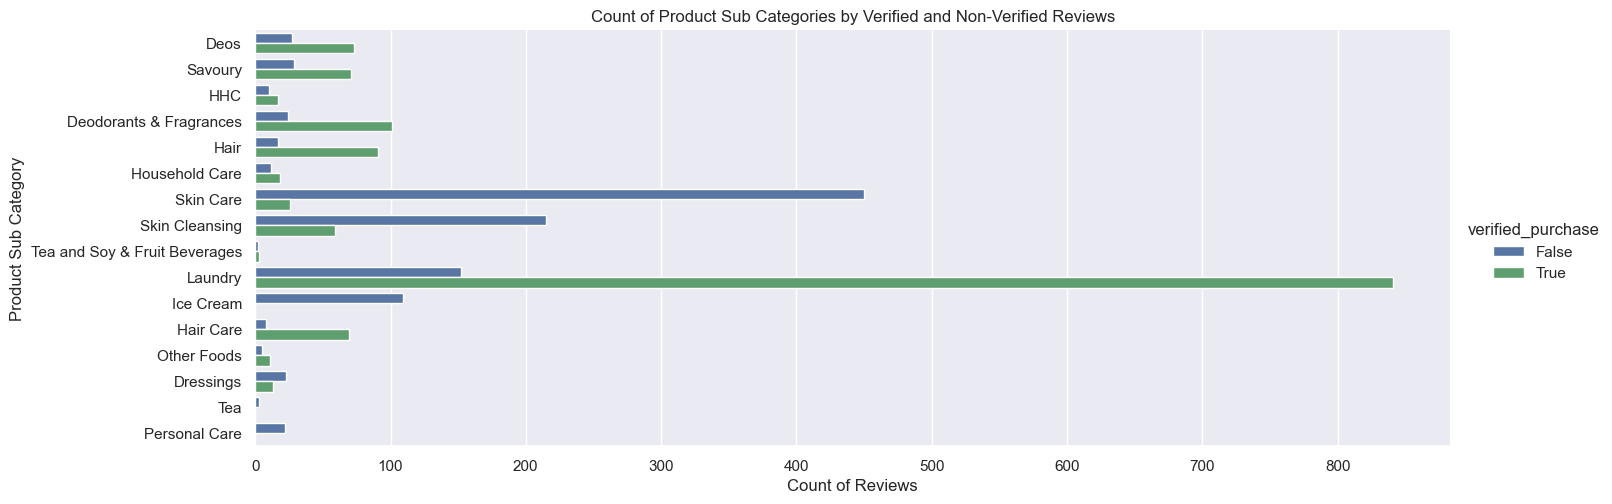

In [626]:

# Create a count plot for product sub-categories, grouped by verified purchases
sns.catplot(y='sub_category', kind="count", hue="verified_purchase", data=data, palette=colors, height=5, aspect=3)

# Set labels and title
plt.ylabel("Product Sub Category")
plt.xlabel("Count of Reviews")
plt.title("Count of Product Sub Categories by Verified and Non-Verified Reviews")

# Show the plot
plt.show()

> Looking further into the categories, we can see that the sub-categories with more unverified reviews are under skin care, skin cleansing, personal care and dressings. Most of them are under the Personal care category, with exception to dressings, which falls under the Foods section. 

> Laundry happens to be the place with the most number of purchases and the highest number of verified purchases, which adds up to the graph above where this sub-cateogory falls under the Home care category.

In [627]:
print(data['verified_purchase'].unique())


[ True False]


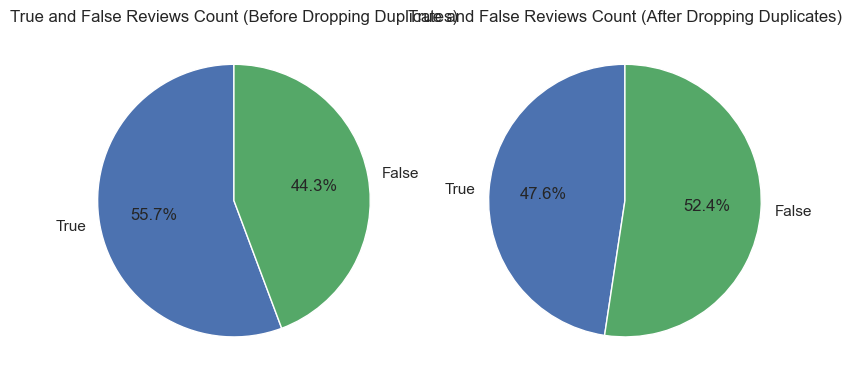

In [628]:
colors = ['#4c72b0', '#55a868']
plt.figure(figsize=(8, 4)); 
for i, (df, title) in enumerate(zip([data, review_data], ['Before Dropping Duplicates', 'After Dropping Duplicates'])): 
    plt.subplot(1, 2, i + 1); 
    plt.pie(df['verified_purchase'].value_counts().reindex([True, False]).fillna(0).values, 
            colors=colors, 
            labels=df['verified_purchase'].value_counts().reindex([True, False]).fillna(0).index.astype(str), 
            autopct='%1.1f%%', 
            startangle=90); 
    plt.title(f'True and False Reviews Count ({title})'); 
plt.tight_layout(); plt.show()

> The Verified Purchases (VP) column serves as the target variable, showing a nearly balanced distribution of true (56%) and false (44%) reviews. Amazon's VP feature combats fake reviews by requiring purchase confirmation, enhancing feedback credibility from genuine buyers.

>After removing duplicates, the distribution reflects  of True (47%) and  False (52%) reviews, indicating a slight increase in the number of False values while still maintaining a balanced dataset.



We analyzed the Verified Purchases (VP) data, which tells us whether a review is from a customer who actually bought the product. Initially, the reviews were split between 56% true (from verified purchases) and 44% false (from non-verified purchases). This means that most reviews were from people who had purchased the product, but there was still a significant amount from those who hadn’t.

Amazon's Verified Purchase system helps reduce fake reviews by only allowing reviews from people who have made a purchase, giving more trust to the feedback.

After removing duplicate reviews, we found that True reviews dropped to 47% and False reviews increased slightly to 52%. This shows a small shift in the balance but overall, the dataset remains well-balanced between true and false reviews."


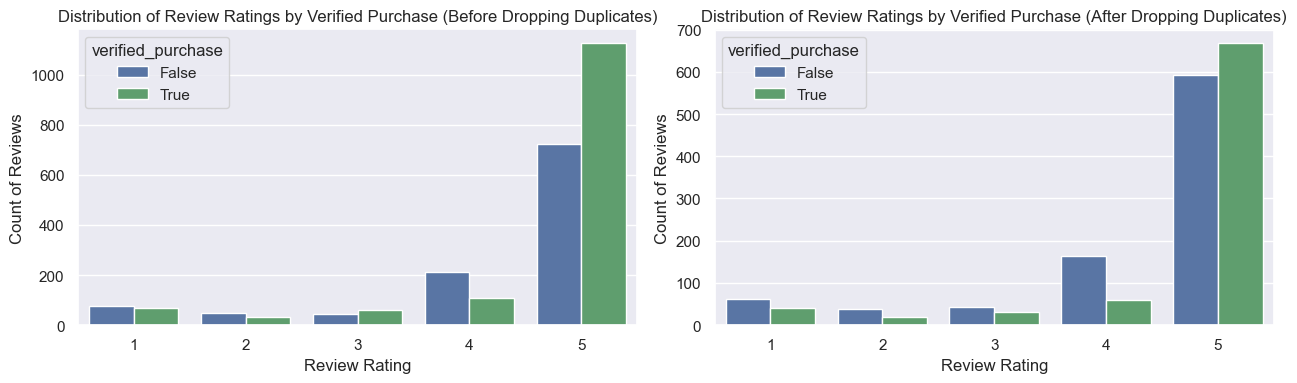

In [629]:

# EDA: Distribution of Review Ratings
#  Set figure size
plt.figure(figsize=(13, 4))

# Loop through datasets and titles
for i, (df, title) in enumerate(zip([data, review_data], ['Before Dropping Duplicates', 'After Dropping Duplicates'])):
    plt.subplot(1, 2, i + 1)  # Create a subplot
    sns.countplot(x='review_rating', hue='verified_purchase', data=df, palette=colors)  # Create the count plot
    plt.xlabel("Review Rating")  # Set x-axis label
    plt.ylabel("Count of Reviews")  # Set y-axis label
    plt.title(f"Distribution of Review Ratings by Verified Purchase ({title})")  # Set title

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

> The analysis reveals that while removing duplicates significantly reduces total review counts, the distribution between true and false reviews remains consistent, with the 5-star rating continuing to dominate.

“After analyzing the data and removing duplicate reviews, we noticed a significant drop in the overall number of reviews. However, the proportion of true and false reviews stayed nearly the same. Even with duplicates removed, the majority of reviews continue to have 5-star ratings, which suggests that high ratings aren’t being artificially inflated by duplicates. This helps us confirm that the integrity of the ratings distribution is preserved, and fraudulent activity, if any, is spread across all ratings in similar proportions.

### REVIEW TEXT EDA

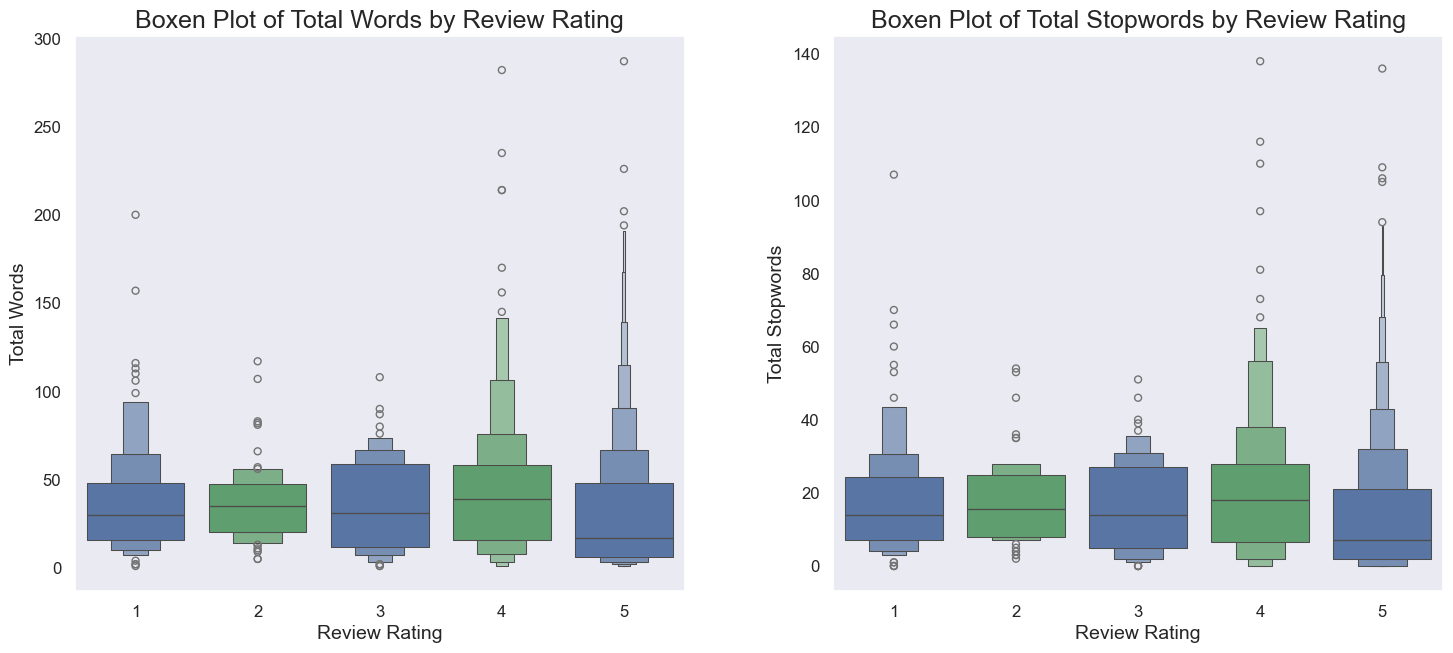

In [630]:
# Set the figure size
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns

# Boxen Plot for Total Words by Review Rating
sns.boxenplot(x='review_rating', y='total_words', data=review_data, palette=colors, ax=axes[0])
axes[0].set_title('Boxen Plot of Total Words by Review Rating', fontsize=18)
axes[0].set_xlabel('Review Rating', fontsize=14)
axes[0].set_ylabel('Total Words', fontsize=14)
axes[0].tick_params(axis='both', labelsize=12)
axes[0].grid(axis='y')

# Boxen Plot for Total Stopwords by Review Rating
sns.boxenplot(x='review_rating', y='total_stopwords', data=review_data, palette=colors, ax=axes[1])
axes[1].set_title('Boxen Plot of Total Stopwords by Review Rating', fontsize=18)
axes[1].set_xlabel('Review Rating', fontsize=14)
axes[1].set_ylabel('Total Stopwords', fontsize=14)
axes[1].tick_params(axis='both', labelsize=12)
axes[1].grid(axis='y')

# Adjust layout
plt.tight_layout(pad=5)
plt.show()

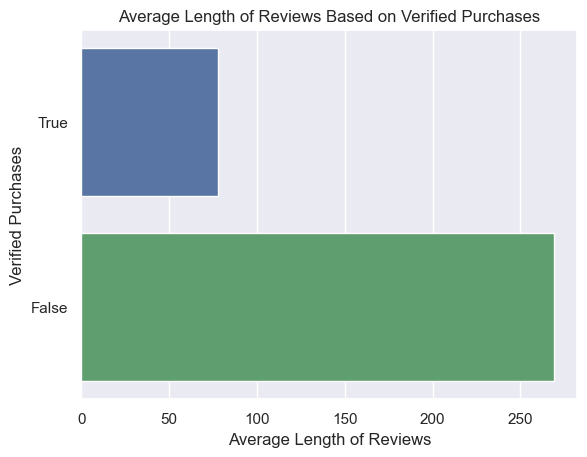

In [631]:
# Select relevant columns
cols = ["verified_purchase", "review_text"]
vprt = review_data[cols]  # Making a subset of the DataFrame

# Filtering based on True and False VP
checkTrue = vprt["verified_purchase"] == True
filtered_true = vprt[checkTrue]

checkFalse = vprt["verified_purchase"] == False
filtered_false = vprt[checkFalse]

# Average review length based on True and False VP
false_average_length = filtered_false["review_text"].apply(len).mean()
true_average_length = filtered_true["review_text"].apply(len).mean()

# Prepare data for plotting
x = [true_average_length, false_average_length]
y = ["True", "False"]

# Plotting the graph
sns.barplot(x=x, y=y, palette=colors)
plt.xlabel("Average Length of Reviews")
plt.ylabel("Verified Purchases")
plt.title("Average Length of Reviews Based on Verified Purchases")
plt.show()

>The graph reveals that the average length of reviews marked as false (unverified purchases) exceeds that of verified reviews. Specifically, false reviews average over 250 characters, while verified reviews typically range between 50 and 100 characters.

>This finding aligns with observations from platforms specializing in identifying fraudulent reviews, which suggest that fake reviews often have longer lengths compared to legitimate ones. The longer average length of false reviews may indicate an attempt to appear more detailed or convincing, even when the reviewer lacks genuine experience with the product.

## PRE-PROCESSING

Text preprocessing is essential for cleaning text data and making it suitable for model training. Text data often contains noise, such as emotions, punctuation, and varying cases, which complicates analysis. Since machines process numbers rather than words, efficient conversion of text to numerical format is necessary.

## Summary of Noise in Review Text
The summary statistics reveal occurrences of the aforementioned noise within the review text, prompting the need for thorough preprocessing.

> To Do
1. Drop unwanted columns:Eliminate any irrelevant features that do not contribute to the analysis.
2. Lowercasing:Convert all text to lowercase to maintain uniformity and avoid case sensitivity issues.
3. Remove Stopwords:Eliminate common words (e.g., "and," "the") that do not add significant meaning to the reviews.
4. Remove Punctuations and Special charas: Clean the text by removing punctuation marks and special characters to focus on the actual words.
5. Stemming: Reduce words to their base or root form to standardize variations (e.g., "running" to "run").

In [632]:
# #DROP UNNECESSARY COLUMNS
# review_data.drop(["total words","total characters",
#          "total stopwords","total punctuations",
#          "total uppercases","review_rating"], axis=1, inplace=True)
review_data.head()

,review_rating,review_text,verified_purchase,total_words,total_characters,total_stopwords,total_punctuations,total_uppercases
0,5,"As you get older, you know what you like and w...",True,39,202,19,7,5
1,5,Three gigantic marmite jars that will last pro...,True,30,175,9,6,4
2,4,Excellent,True,1,9,0,0,1
3,5,A great flavour top - up for slow cooking.,True,9,42,3,2,1
4,5,Does what is says it does,False,6,25,5,0,1


For now, we are going to be only utlizing review_text and verified_purchase for our classifiers.

In [633]:
#CORRECT SPELLING
review_data.review_text.apply(lambda i: ''.join(TextBlob(i).correct()))

0       Is you get older, you know what you like and w...
1       Three gigantic marie wars that will last proba...
2                                               Excellent
3              A great flavour top - up for slow cooking.
4                               Does what is says it does
5                             Excellent item.Good for men
6                               Thank you ofm very happy
7                                               Beautiful
8                                 Always buy. Fig bottles
9       Always use this product on my heavily mistreat...
10                                            Great value
11      tos not the one in the picture, but gets 5 st...
12      Stem as described, excellent quality, rapid de...
13             Good body wash but not a very strong smell
14                                                  Great
15                                              North it!
16      I remember trying this at a friends house year...
17            

In [634]:

#REMOVING THE STOPWORDS,PUNCTUATIONS, LOWERCASING, AND STEMMING OF THE SENTENCES
# Ensure that the NLTK stopwords are downloaded
nltk.download('stopwords')

# Define the stop words
sw = set(stopwords.words('english'))

# Function for text preprocessing
def text_preprocessing(text):
    # Remove special characters and punctuations
    removed_special_characters = re.sub("[^a-zA-Z]", " ", str(text))
    
    # Tokenize and lowercase the text
    tokens = removed_special_characters.lower().split()
    
    # Initialize the stemmer
    stemmer = PorterStemmer()
    cleaned = []
    stemmed = []
    
    # Remove stop words
    for token in tokens:
        if token not in sw:
            cleaned.append(token)
            
    # Stem the cleaned tokens
    for token in cleaned:
        token = stemmer.stem(token)
        stemmed.append(token)

    # Join stemmed tokens into a single string and return
    return " ".join(stemmed)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [635]:
review_data['review_text'] = review_data['review_text'].apply(text_preprocessing)

In [636]:
review_data['review_text']

0       get older know like suitabl bodi like dove pro...
1       three gigant marmit jar last probabl whole lif...
2                                                   excel
3                             great flavour top slow cook
4                                                     say
5                                     excel item good men
6                                             thank happi
7                                                  beauti
8                                     alway buy big bottl
9       alway use product heavili mistreat hair work w...
10                                             great valu
11      one pictur get star regular one use awesom peo...
12      item describ excel qualiti rapid deliveri grea...
13                            good bodi wash strong smell
14                                                  great
15                                                  worth
16      rememb tri friend hous year ago ive use month ...
17            

In [637]:
#CHECK RARE WORDS
r = pd.Series(' '.join(review_data['review_text']).split()).value_counts()[-10:]
print("RARE WORDS:")
print(r)

RARE WORDS:
accident     1
chuck        1
emigr        1
salt         1
mushroom     1
fli          1
cult         1
revitalis    1
advantag     1
tendon       1
Name: count, dtype: int64


In [638]:
def generate_horizontal_word_clouds(data, text_column, positive_threshold=4, negative_threshold=2):
    """
    Generate and display word clouds for positive and negative reviews.
    
    Parameters:
    - data: DataFrame containing the reviews
    - text_column: The column name containing the review texts
    - positive_threshold: Rating threshold for positive reviews
    - negative_threshold: Rating threshold for negative reviews
    """
    
    # Ensure all entries in the review_text column are strings
    data[text_column] = data[text_column].fillna('').astype(str)

    # Generate Word Cloud for Positive Reviews
    positive_reviews = data[data['review_rating'] >= positive_threshold][text_column].str.cat(sep=' ')
    wordcloud_pos = WordCloud(width=400, height=400, background_color='white', max_words=200, collocations=True,
                              colormap='viridis', max_font_size=100, min_font_size=10).generate(positive_reviews)

    # Generate Word Cloud for Negative Reviews
    negative_reviews = data[data['review_rating'] <= negative_threshold][text_column].str.cat(sep=' ')
    wordcloud_neg = WordCloud(width=400, height=400, background_color='white', max_words=50, collocations=False,
                              colormap='plasma', max_font_size=100, min_font_size=10).generate(negative_reviews)

    # Display Word Clouds Horizontally
    plt.figure(figsize=(10, 5))  # Increased width for more spacing

    # Positive Word Cloud
    plt.subplot(1, 2, 1)
    plt.imshow(wordcloud_pos, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Positive Reviews', pad=20, fontsize=16)

    # Negative Word Cloud
    plt.subplot(1, 2, 2)
    plt.imshow(wordcloud_neg, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud for Negative Reviews', pad=20, fontsize=16)

    # Adjust spacing between charts
    plt.subplots_adjust(wspace=0.5)

    plt.tight_layout()
    plt.show()

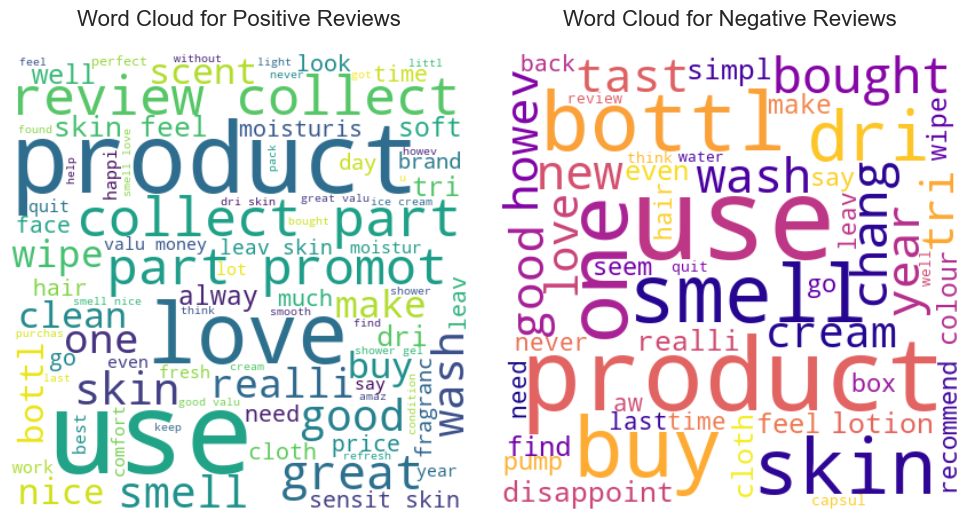

In [639]:

# Call the function
generate_horizontal_word_clouds(review_data, 'review_text')

>After analyzing the review data, we found that the most common words used in the reviews tend to be positive, indicating that customers generally have a good experience with the products.

1. Common Words: We removed some of the most frequent words that didn't add much meaning to the reviews. After doing this, we identified the top 10 words that reflect customer sentiment.

2. Positive Sentiment: The overall tone of the reviews is positive, which is a good sign for the products being analyzed.

3. Limitation: It’s important to note that our dataset lacks negative reviews. This could lead to challenges when trying to determine whether a review is "fake" or "real" based solely on the sentiment, as we don't have enough examples of negative feedback to compare agains

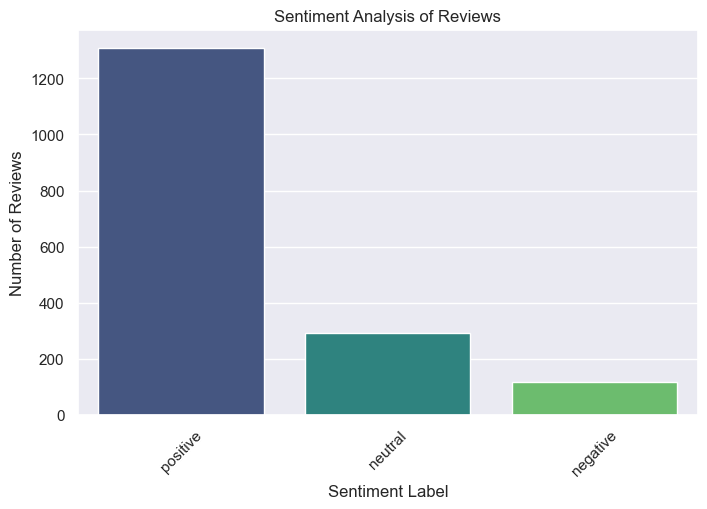

In [640]:
import pandas as pd
from textblob import TextBlob



# Function to get sentiment polarity
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns a value between -1 (negative) and 1 (positive)

# Apply the function to the review text column
review_data['sentiment'] = review_data['review_text'].apply(get_sentiment)

# Classify sentiment based on polarity
review_data['sentiment_label'] = review_data['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Display results
review_data[['review_text', 'sentiment', 'sentiment_label']]
# Count the occurrences of each sentiment label
sentiment_counts = review_data['sentiment_label'].value_counts()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

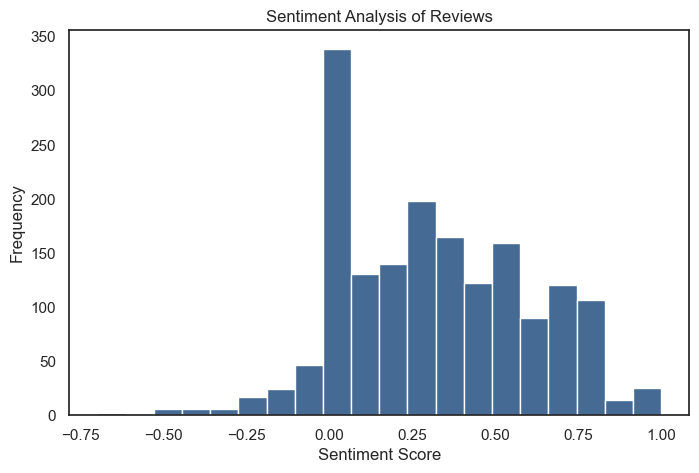

In [641]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

# Assuming review_data is already defined and contains a 'sentiment' column
plt.figure(figsize=(8, 5))
sns.histplot(review_data['sentiment'], bins=20, color='#063970', palette='viridis')  # Change 'skyblue' to any color you prefer
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional: Add gridlines for better readability
plt.grid(False)
plt.show()


In [642]:
review_data['review_text'].apply(word_tokenize).head()

0    [get, older, know, like, suitabl, bodi, like, ...
1    [three, gigant, marmit, jar, last, probabl, wh...
2                                              [excel]
3                    [great, flavour, top, slow, cook]
4                                                [say]
Name: review_text, dtype: object

In [643]:

#SAVING UPDATED DATAFRAME AS .csv FILE
review_data.to_csv('C:/Data_Science/Mini Project/Capston Project/Capston_IOD_Project/DATABASE files/cleaned_data.csv')

# MODEL IMPLEMENTATION AND EVALUATION

This is the stage where the three models are built, optimized and evaluated.

Models used: `` Multinominal Naive Bayes`` , ``Support Vector Machine``, ``Logistic Regression``

Evaluation methods used: ``accuracy, precision, recall, f1_score`` and ``confusion matrix``

## Summary

After appropriate evaluation, LR with count vectorizer has been deemed the best. The rest of the models has all worked above 80% accuracy, with the other metrics working out above 79%. 

In [644]:


import sklearn
print(sklearn.__version__)

1.5.2


In [645]:
#LIBRARIES 
import warnings
warnings.simplefilter("ignore")

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, ConfusionMatrixDisplay)
import matplotlib.pyplot as plt


In [646]:
#lOADING DATASETS 
update_file_path = r"C:\Data_Science\Mini Project\Capston Project\Capston_IOD_Project\DATABASE files\updated_data.csv"
clear_file_path = r"C:\Data_Science\Mini Project\Capston Project\Capston_IOD_Project\DATABASE files\cleaned_data.csv"
# Try loading the CSV file with a different encoding

try:
    data = pd.read_csv(clear_file_path, encoding='ISO-8859-1')  # or use 'cp1252'
    review_data = pd.read_csv(update_file_path, encoding='ISO-8859-1')  # or use 'cp1252'
    #REMOVE MAX
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    
except Exception as e:
    print("Error loading file:", e)
#DROP EXTRA COLUMNS
data.drop(['Unnamed: 0'], axis=1, inplace=True)
review_data.drop(['Unnamed: 0'], axis=1, inplace=True)

# DOUBLE-CHECKING...

Double checking if there are any NULL values within the dataset. This would cause issues later on if there are as such.

In [647]:
#CHECKING WHICH ROW IS NULL FROM PRE-PROCESSING
checkNULL = data.isnull()
checkNULL = checkNULL.any(axis=1)
data[checkNULL]

,review_rating,review_text,verified_purchase,total_words,total_characters,total_stopwords,total_punctuations,total_uppercases,sentiment,sentiment_label
191,5,NaN,True,1,2,0,1,1,0.0,neutral
523,5,NaN,True,1,2,0,1,0,0.0,neutral
1072,5,NaN,True,1,4,1,0,0,0.0,neutral
1111,5,NaN,True,4,19,4,0,1,0.0,neutral
1230,5,NaN,True,1,2,0,1,1,0.0,neutral
1316,5,NaN,True,1,6,0,5,1,0.0,neutral


In [648]:
review_data = review_data.drop_duplicates().reset_index(drop=True)

In [649]:
review_data.head()

,review_rating,review_text,verified_purchase
0,5,"As you get older, you know what you like and w...",True
1,5,Three gigantic marmite jars that will last pro...,True
2,4,Excellent,True
3,5,A great flavour top - up for slow cooking.,True
4,5,Does what is says it does,False


In [650]:
print(review_data.shape) 

(1632, 3)


In [651]:
review_data.iloc[[191, 523, 1072, 1111, 1230, 1316], [1, 2]]

,review_text,verified_purchase
191,perfect,True
523,Smells divine ! Will definitely recommend !,True
1072,My the best choice. Fragrance is perfect and m...,False
1111,I love this body wash because it has such a su...,False
1230,good,False
1316,Thank god somebody delivers to Brazil!!! Makin...,True


In [652]:
#DROP THE NULL ROWS
data = data.dropna(how='any',axis=0) 

In [653]:
#UPDATED VP VALUES 
data["verified_purchase"].value_counts(normalize=True)

verified_purchase
False    0.525701
True     0.474299
Name: proportion, dtype: float64

# MODELING

Within the dataset, there are currently only two columns. Out of the two, review_text is going to be assigned as the input variable, and verified_purchases as the target variable. The data is then going to be split accordingly.

In [654]:
#SPLIT DATA
X_train, X_test, y_train, y_test = train_test_split(
    data['review_text'], data['verified_purchase'],test_size=0.4, random_state=42) #40% gives best results, 42 is no of life...

entiredf = format(data.shape[0])
traindf = format(X_train.shape[0])
testdf = format(X_test.shape[0])

print('Number of rows:')
print('Entire dataset:', entiredf)
print('Train dataset:', traindf)
print('Test dataset:',testdf)

Number of rows:
Entire dataset: 1712
Train dataset: 1027
Test dataset: 685


The data is decided to be split into 60 - 40, which has been determined by trial and error. This splitting produces the highest accuracy for the models, and thus we are going to with that. 

## COUNT VECTORIZER AND MODELING

word vectorization maps words or phrases from a lexicon to a matching vector of real numbers, which may then be used to determine word predictions and semantics, and this is done due to the fact that models only understand numerical data.

We are going to be utlizing two of the vectorization methods, the first one being count vectorizer. We just count the number of times a word appears in the document in CountVectorizer, which results in a bias in favor of the most common terms.

In [655]:
count_vectorizer  = CountVectorizer(stop_words='english')
count_vectorizer.fit(X_train)
print('\nVocabulary: \n', count_vectorizer.vocabulary_)

train_c = count_vectorizer.fit_transform(X_train)
test_c = count_vectorizer.transform(X_test)


Vocabulary: 
 {'current': 415, 'sell': 1501, 'price': 1312, 'compar': 343, 'supermarket': 1709, 'product': 1323, 'good': 762, 'smell': 1567, 'pleasant': 1272, 'need': 1136, 'add': 14, 'small': 1562, 'cloth': 321, 'fresh': 702, 'great': 778, 'moisturis': 1102, 'use': 1849, 'sensit': 1505, 'skin': 1550, 'love': 1011, 'pour': 1295, 'smaller': 1563, 'bottl': 194, 'make': 1034, 'manag': 1038, 'beat': 137, 'decent': 434, 'fabric': 616, 'soften': 1584, 'nice': 1144, 'fragranc': 697, 'purchas': 1337, 'deliveri': 458, 'cream': 399, 'handwash': 803, 'cheaper': 282, 'hand': 800, 'better': 155, 'liquid': 990, 'oh': 1176, 'wing': 1922, 'dove': 516, 'kitchen': 942, 'bathroom': 131, 'shower': 1530, 'room': 1439, 'recommend': 1381, 'highli': 832, 'star': 1640, 'simpl': 1540, 'gel': 729, 'like': 979, 'glue': 755, 'hard': 807, 'rub': 1447, 'slip': 1559, 'bath': 130, 'goe': 758, 'smoothli': 1573, 'easili': 541, 'wast': 1890, 'leav': 966, 'feel': 645, 'silki': 1538, 'soft': 1583, 'scenti': 1480, 'review'

## TFIDF VECTORIZER AND MODELING

We examine the total document weightage of a word in TfidfVectorizer. It assists us in coping with the most common terms. We may use it to penalize them. The word counts are weighted by a measure of how frequently they appear in the documents in TfidfVectorizer.

In [656]:
TFIDF_vectorizer  = TfidfVectorizer(stop_words='english')

TFIDF_vectorizer.fit(X_train)
print('\nVocabulary: \n', TFIDF_vectorizer.vocabulary_)

train_tf = TFIDF_vectorizer.fit_transform(X_train)
test_tf = TFIDF_vectorizer.transform(X_test)


Vocabulary: 
 {'current': 415, 'sell': 1501, 'price': 1312, 'compar': 343, 'supermarket': 1709, 'product': 1323, 'good': 762, 'smell': 1567, 'pleasant': 1272, 'need': 1136, 'add': 14, 'small': 1562, 'cloth': 321, 'fresh': 702, 'great': 778, 'moisturis': 1102, 'use': 1849, 'sensit': 1505, 'skin': 1550, 'love': 1011, 'pour': 1295, 'smaller': 1563, 'bottl': 194, 'make': 1034, 'manag': 1038, 'beat': 137, 'decent': 434, 'fabric': 616, 'soften': 1584, 'nice': 1144, 'fragranc': 697, 'purchas': 1337, 'deliveri': 458, 'cream': 399, 'handwash': 803, 'cheaper': 282, 'hand': 800, 'better': 155, 'liquid': 990, 'oh': 1176, 'wing': 1922, 'dove': 516, 'kitchen': 942, 'bathroom': 131, 'shower': 1530, 'room': 1439, 'recommend': 1381, 'highli': 832, 'star': 1640, 'simpl': 1540, 'gel': 729, 'like': 979, 'glue': 755, 'hard': 807, 'rub': 1447, 'slip': 1559, 'bath': 130, 'goe': 758, 'smoothli': 1573, 'easili': 541, 'wast': 1890, 'leav': 966, 'feel': 645, 'silki': 1538, 'soft': 1583, 'scenti': 1480, 'review'

In [657]:
# Input and target variables
X = df['review_text']
y = df['verified_purchase']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Print the number of rows
print('Number of rows:')
print('Entire dataset:', len(df))
print('Train dataset:', len(X_train))
print('Test dataset:', len(X_test))

# Reset seaborn defaults
sns.reset_defaults()

Number of rows:
Entire dataset: 1718
Train dataset: 1030
Test dataset: 688



Results Summary:


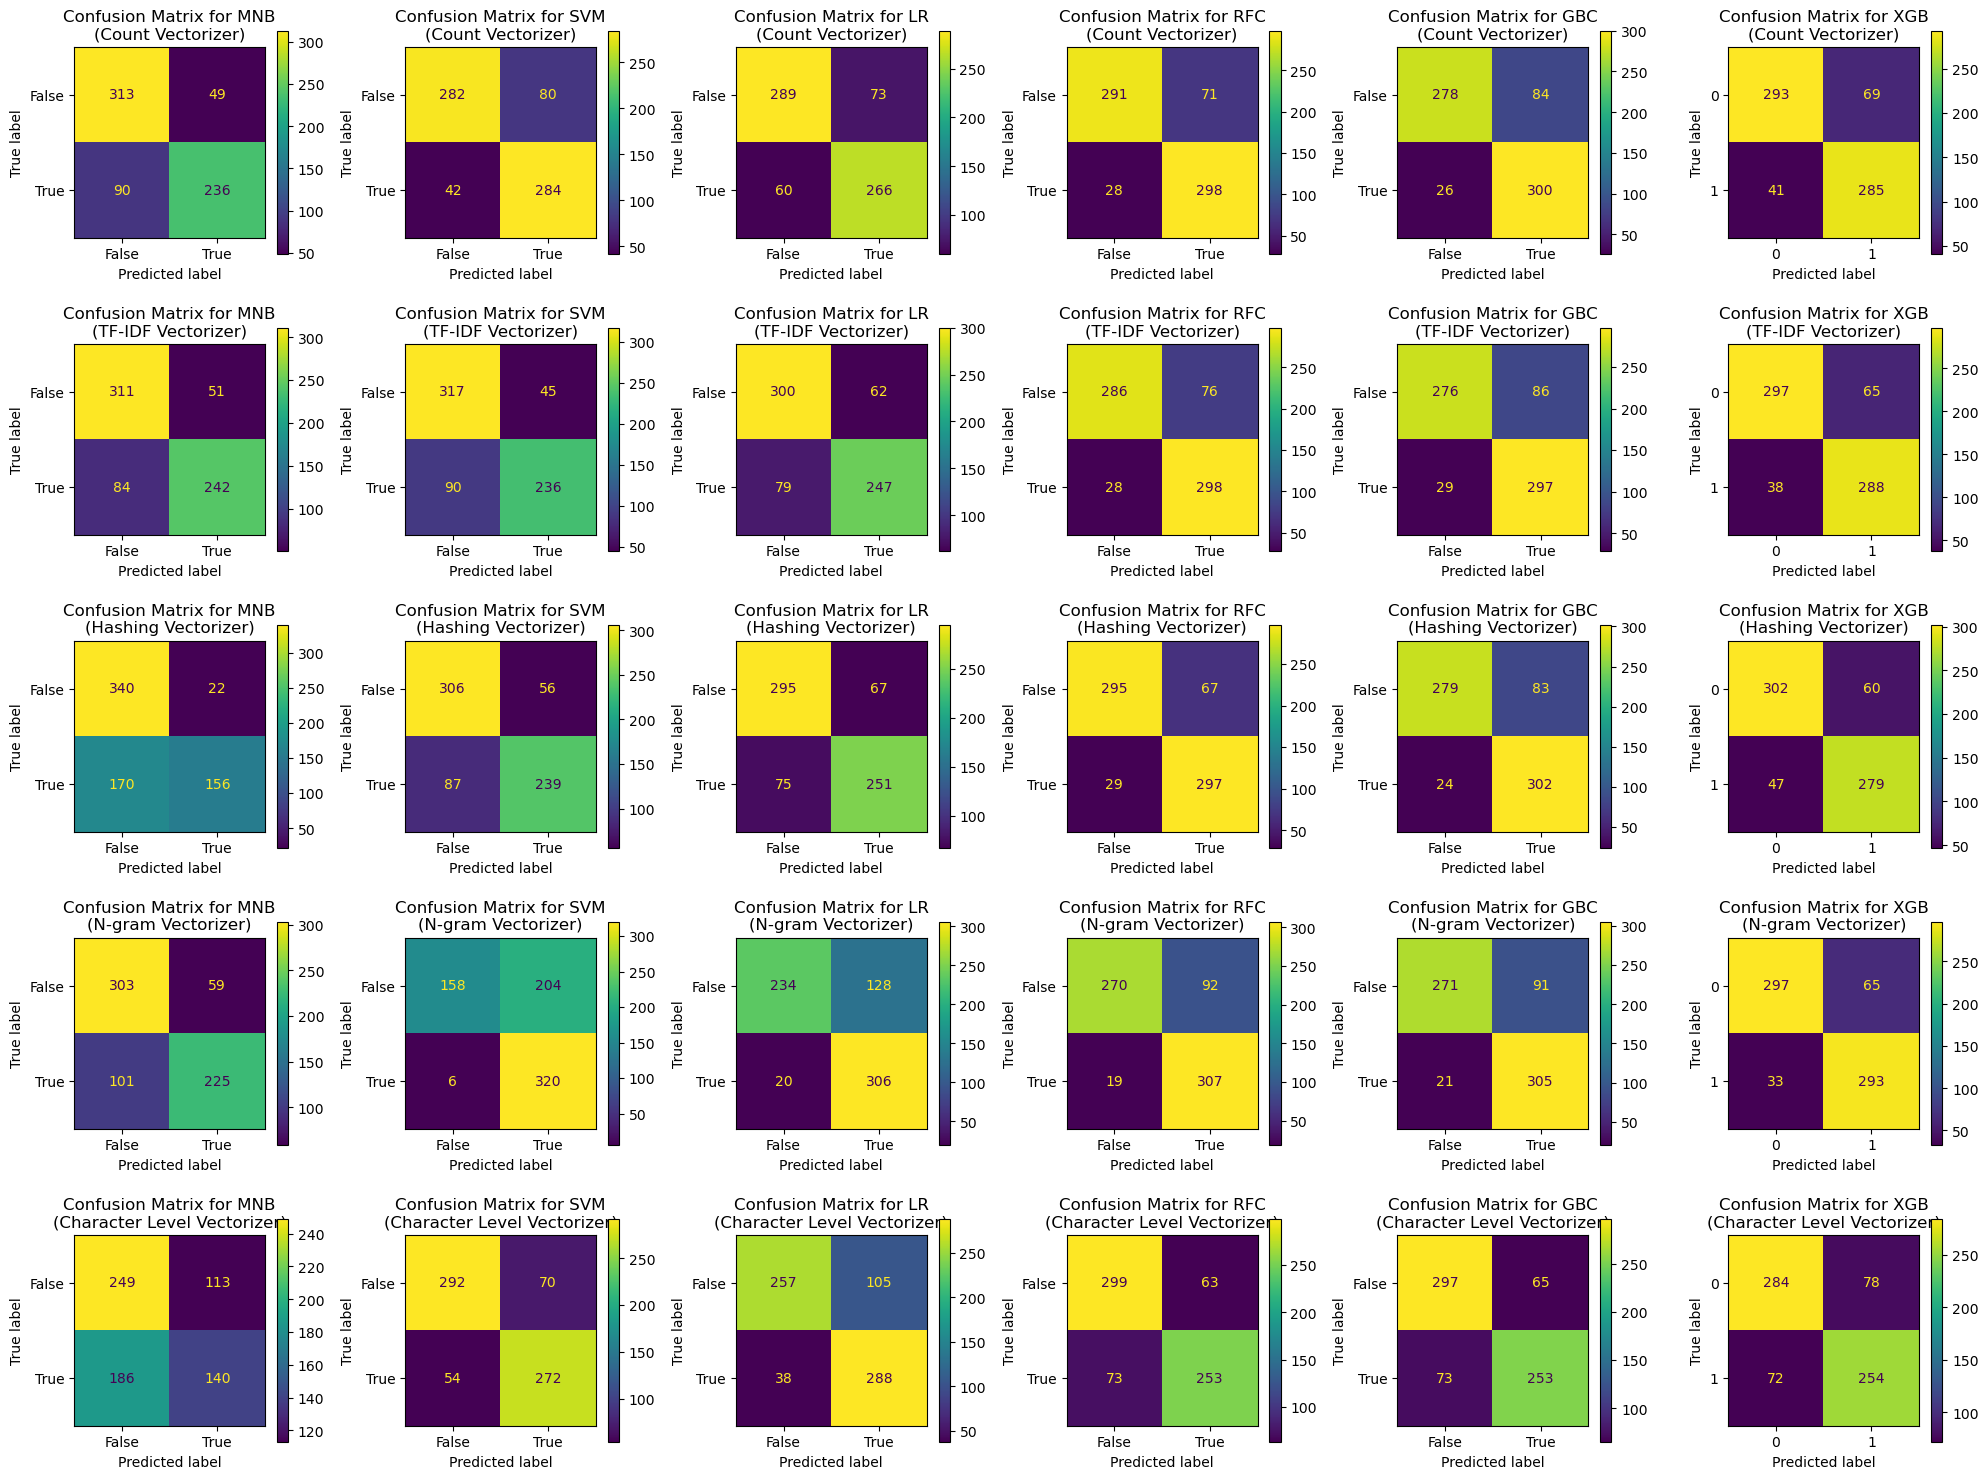

In [765]:



# Models and their corresponding vectorizers
models = {
    'MNB': MultinomialNB(),
    'SVM': SVC(probability=True),
    'LR': LogisticRegression(max_iter=1000),
    'RFC': RandomForestClassifier(),
    'GBC': GradientBoostingClassifier(),
    'XGB': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Define vectorizers
vectorizers = {
    'Count Vectorizer': CountVectorizer(stop_words='english'),
    'TF-IDF Vectorizer': TfidfVectorizer(stop_words='english'),
    'Hashing Vectorizer': HashingVectorizer(stop_words='english', alternate_sign=False),
    'N-gram Vectorizer': CountVectorizer(ngram_range=(1, 2), stop_words='english'),
    'Character Level Vectorizer': CountVectorizer(analyzer='char', stop_words='english'),
}

# Initialize figure for subplots
fig, axs = plt.subplots(len(vectorizers), len(models), figsize=(20, 15))

# Initialize lists to store results
results = []

# Function to train and evaluate models
def evaluate_pipeline(pipeline, model_name, vectorizer_name, ax):
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions) 
    recall = recall_score(y_test, predictions) 
    f1 = f1_score(y_test, predictions) 
    cm = confusion_matrix(y_test, predictions)
    
    display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)
    display.plot(ax=ax)
    ax.set_title(f'Confusion Matrix for {model_name}\n({vectorizer_name})', fontsize=12)
    
    tn, fp, fn, tp = cm.ravel()
    return accuracy, precision, recall, f1, tn, fp, fn, tp

# Evaluate models with all vectorizers
for vectorizer_name, vectorizer in vectorizers.items():
    for i, (model_name, model) in enumerate(models.items()):
        pipeline = Pipeline([
            (vectorizer_name, vectorizer),
            ('scaler', StandardScaler(with_mean=False)),  # Add scaler here
            ('classifier', model)
        ])
        
        accuracy, precision, recall, f1, tn, fp, fn, tp = evaluate_pipeline(pipeline, model_name, vectorizer_name, axs[list(vectorizers.keys()).index(vectorizer_name), i])
        # Add confusion matrix components to results
        results.append([model_name, vectorizer_name, accuracy, precision, recall, f1, tn, fp, fn, tp])

# Create a DataFrame to display the results
results_df = pd.DataFrame(results, columns=['Model', 'Vectorizer', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1 Score (%)', 'TN', 'FP', 'FN', 'TP'])

# Display the results summary
print("\nResults Summary:")
results_df

# Show all plots at once
plt.tight_layout()
plt.show()


In [766]:
# Identify the best overall model based on Accuracy
best_overall_model_without_hyper = results_df.loc[results_df['Accuracy (%)'].idxmax()]
print("\nBest Model Based on Accuracy (without hyperparameter) :")
print(best_overall_model_without_hyper)


Best Model Based on Accuracy (without hyperparameter) :
Model                           RFC
Vectorizer       Hashing Vectorizer
Accuracy (%)               0.860465
Precision (%)              0.815934
Recall (%)                 0.911043
F1 Score (%)                0.86087
TN                              295
FP                               67
FN                               29
TP                              297
Name: 15, dtype: object


In [767]:
# Pivot the DataFrame to have Vectorizers as columns
pivot_df = results_df.pivot(index='Model', columns='Vectorizer', values=['Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1 Score (%)'])
pivot_df.columns = [f'{metric} {vectorizer}' for metric, vectorizer in pivot_df.columns]


In [769]:
# Pivot the DataFrame to have Vectorizers as columns
pivot_df = results_df.pivot(index='Model', columns='Vectorizer', values=['TN', 'FP', 'FN', 'TP'])
pivot_df.columns = [f'{metric} {vectorizer}' for metric, vectorizer in pivot_df.columns]


In [770]:
pivot_df

,TN Character Level Vectorizer,TN Count Vectorizer,TN Hashing Vectorizer,TN N-gram Vectorizer,TN TF-IDF Vectorizer,FP Character Level Vectorizer,FP Count Vectorizer,FP Hashing Vectorizer,FP N-gram Vectorizer,FP TF-IDF Vectorizer,FN Character Level Vectorizer,FN Count Vectorizer,FN Hashing Vectorizer,FN N-gram Vectorizer,FN TF-IDF Vectorizer,TP Character Level Vectorizer,TP Count Vectorizer,TP Hashing Vectorizer,TP N-gram Vectorizer,TP TF-IDF Vectorizer
Model,,,,,,,,,,,,,,,,,,,,
GBC,297,278,279,271,276,65,84,83,91,86,73,26,24,21,29,253,300,302,305,297
LR,257,289,295,234,300,105,73,67,128,62,38,60,75,20,79,288,266,251,306,247
MNB,249,313,340,303,311,113,49,22,59,51,186,90,170,101,84,140,236,156,225,242
RFC,299,291,295,270,286,63,71,67,92,76,73,28,29,19,28,253,298,297,307,298
SVM,292,282,306,158,317,70,80,56,204,45,54,42,87,6,90,272,284,239,320,236
XGB,284,293,302,297,297,78,69,60,65,65,72,41,47,33,38,254,285,279,293,288


In [771]:
results_df

,Model,Vectorizer,Accuracy (%),Precision (%),Recall (%),F1 Score (%),TN,FP,FN,TP
0,MNB,Count Vectorizer,0.797965,0.828070,0.723926,0.772504,313,49,90,236
1,SVM,Count Vectorizer,0.822674,0.780220,0.871166,0.823188,282,80,42,284
2,LR,Count Vectorizer,0.806686,0.784661,0.815951,0.800000,289,73,60,266
3,RFC,Count Vectorizer,0.856105,0.807588,0.914110,0.857554,291,71,28,298
4,GBC,Count Vectorizer,0.840116,0.781250,0.920245,0.845070,278,84,26,300
5,XGB,Count Vectorizer,0.840116,0.805085,0.874233,0.838235,293,69,41,285
6,MNB,TF-IDF Vectorizer,0.803779,0.825939,0.742331,0.781906,311,51,84,242
7,SVM,TF-IDF Vectorizer,0.803779,0.839858,0.723926,0.777595,317,45,90,236
8,LR,TF-IDF Vectorizer,0.795058,0.799353,0.757669,0.777953,300,62,79,247
9,RFC,TF-IDF Vectorizer,0.848837,0.796791,0.914110,0.851429,286,76,28,298


In [772]:
top_models_without_para = results_df.sort_values(by='Accuracy (%)',  ascending=False).head(5)

# Display the top 5 models
top_models_without_para

,Model,Vectorizer,Accuracy (%),Precision (%),Recall (%),F1 Score (%),TN,FP,FN,TP
15,RFC,Hashing Vectorizer,0.860465,0.815934,0.911043,0.860870,295,67,29,297
23,XGB,N-gram Vectorizer,0.857558,0.818436,0.898773,0.856725,297,65,33,293
3,RFC,Count Vectorizer,0.856105,0.807588,0.914110,0.857554,291,71,28,298
11,XGB,TF-IDF Vectorizer,0.850291,0.815864,0.883436,0.848306,297,65,38,288
9,RFC,TF-IDF Vectorizer,0.848837,0.796791,0.914110,0.851429,286,76,28,298


In [773]:
best_model = results_df.loc[results_df['Accuracy (%)'].idxmax()]
print("\nBest Model Based on Accuracy (without hyperparameter) :")
print(best_model)


Best Model Based on Accuracy (without hyperparameter) :
Model                           RFC
Vectorizer       Hashing Vectorizer
Accuracy (%)               0.860465
Precision (%)              0.815934
Recall (%)                 0.911043
F1 Score (%)                0.86087
TN                              295
FP                               67
FN                               29
TP                              297
Name: 15, dtype: object


In [774]:
def best_model(metric):
    return results_df.nlargest(1, metric)
# Get the best model based on different metrics
best_accuracy = best_model('Accuracy (%)')
best_precision = best_model('Precision (%)')
best_recall = best_model('Recall (%)')
best_f1 = best_model('F1 Score (%)')


In [775]:
print("Best Model by Accuracy:")
best_accuracy

Best Model by Accuracy:


,Model,Vectorizer,Accuracy (%),Precision (%),Recall (%),F1 Score (%),TN,FP,FN,TP
15,RFC,Hashing Vectorizer,0.860465,0.815934,0.911043,0.86087,295,67,29,297


In [776]:
print("\nBest Model by Precision:")
best_precision


Best Model by Precision:


,Model,Vectorizer,Accuracy (%),Precision (%),Recall (%),F1 Score (%),TN,FP,FN,TP
12,MNB,Hashing Vectorizer,0.72093,0.876404,0.478528,0.619048,340,22,170,156


In [777]:

print("\nBest Model by Recall:")
best_recall


Best Model by Recall:


,Model,Vectorizer,Accuracy (%),Precision (%),Recall (%),F1 Score (%),TN,FP,FN,TP
19,SVM,N-gram Vectorizer,0.694767,0.610687,0.981595,0.752941,158,204,6,320


In [778]:
print("\nBest Model by F1 Score:")
best_f1


Best Model by F1 Score:


,Model,Vectorizer,Accuracy (%),Precision (%),Recall (%),F1 Score (%),TN,FP,FN,TP
15,RFC,Hashing Vectorizer,0.860465,0.815934,0.911043,0.86087,295,67,29,297


# Hyperparameter optimization methods

In [692]:


# Models and their corresponding parameter grids
models = {
    'MNB': (MultinomialNB(), {'alpha': [0.1, 0.5, 1.0, 2.0]}),
    'SVM': (SVC(probability=True), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'LR': (LogisticRegression(max_iter=1000, solver='saga'), {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2', 'elasticnet']}),
    'RFC': (RandomForestClassifier(), {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}),
    'GBC': (GradientBoostingClassifier(), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}),
    'XGB': (XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1]}),
}

# Define vectorizers
vectorizers = {
    'Count Vectorizer': CountVectorizer(stop_words='english'),
    'TF-IDF Vectorizer': TfidfVectorizer(stop_words='english'),
    'Hashing Vectorizer': HashingVectorizer(stop_words='english', alternate_sign=False),
    'N-gram Vectorizer': CountVectorizer(ngram_range=(1, 2), stop_words='english'),
    'Character Level Vectorizer': CountVectorizer(analyzer='char', stop_words='english'),
}

# Initialize figure for confusion matrix plots
fig, axs = plt.subplots(len(vectorizers), len(models), figsize=(20, 15))

# Initialize lists to store results for RandomizedSearchCV and GridSearchCV
randomized_results = []
grid_results = []
best_model_info = {}

# Function to create a pipeline
def create_pipeline(vectorizer, model):
    return Pipeline([
        ('vectorizer', vectorizer),
        ('scaler', StandardScaler(with_mean=False)),
        ('classifier', model)
    ])

# Function to train and evaluate models with RandomizedSearchCV
def evaluate_model(model, param_grid, vectorizer, X_train, y_train, X_test, y_test, ax, search_type='random'):
    pipeline = create_pipeline(vectorizer, model)
    
    # Use RandomizedSearchCV if search_type is 'random', otherwise use GridSearchCV
    if search_type == 'random':
        search = RandomizedSearchCV(
            pipeline,
            param_distributions={'classifier__' + k: v for k, v in param_grid.items()},
            n_iter=10,
            scoring='accuracy',
            cv=5,
            random_state=42
        )
    else:
        search = GridSearchCV(
            pipeline,
            param_grid={'classifier__' + k: v for k, v in param_grid.items()},
            scoring='accuracy',
            cv=5
        )

    try:
        search.fit(X_train, y_train)
        y_pred = search.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # # Generate the confusion matrix
        # cm = confusion_matrix(y_test, y_pred)
        
        # # Visualize the confusion matrix
        # disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=search.best_estimator_.classes_)
        # disp.plot(ax=ax)  # Plot on the specified axis
        # ax.set_title(f'Confusion Matrix for {model.__class__.__name__} with {vectorizer.__class__.__name__}')

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        return accuracy, precision, recall, f1, tn, fp, fn, tp, search.best_params_
    
    except Exception as e:
        print(f"Error during model evaluation: {e}")
        return None



# Evaluate models with all vectorizers and RandomizedSearchCV
for vectorizer_name, vectorizer in vectorizers.items():
    for model_name, (model, param_grid) in models.items():
        
        results = evaluate_model(model, param_grid, vectorizer, X_train, y_train, X_test, y_test, axs[list(vectorizers.keys()).index(vectorizer_name), list(models.keys()).index(model_name)], search_type='random')
        if results:
            accuracy, precision, recall, f1, tn, fp, fn, tp, best_params = results
            randomized_results.append([model_name, vectorizer_name, accuracy, precision, recall, f1, tn, fp, fn, tp, best_params])

            # Store best model info
            if model_name not in best_model_info or accuracy > best_model_info[model_name][0]:
                best_model_info[model_name] = (accuracy, precision, recall, f1, tn, fp, fn, tp, best_params)

# Create a DataFrame to display the RandomizedSearchCV results
randomized_results_df = pd.DataFrame(randomized_results, columns=['Model', 'Vectorizer', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1 Score (%)', 'TN', 'FP', 'FN', 'TP', 'Best Params'])

# Evaluate models with all vectorizers and GridSearchCV
for vectorizer_name, vectorizer in vectorizers.items():
    for model_name, (model, param_grid) in models.items():
       
        results = evaluate_model(model, param_grid, vectorizer, X_train, y_train, X_test, y_test, axs[list(vectorizers.keys()).index(vectorizer_name), list(models.keys()).index(model_name)], search_type='grid')
        if results:
            accuracy, precision, recall, f1, tn, fp, fn, tp, best_params = results
            grid_results.append([model_name, vectorizer_name, accuracy, precision, recall, f1, tn, fp, fn, tp, best_params])

            # Store best model info
            if model_name not in best_model_info or accuracy > best_model_info[model_name][0]:
                best_model_info[model_name] = (accuracy, precision, recall, f1, tn, fp, fn, tp, best_params)

# Create a DataFrame to display the GridSearchCV results
grid_results_df = pd.DataFrame(grid_results, columns=['Model', 'Vectorizer', 'Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1 Score (%)', 'TN', 'FP', 'FN', 'TP', 'Best Params'])

# Identify the overall best model based on accuracy
best_overall_model = max(best_model_info.items(), key=lambda x: x[1][0])


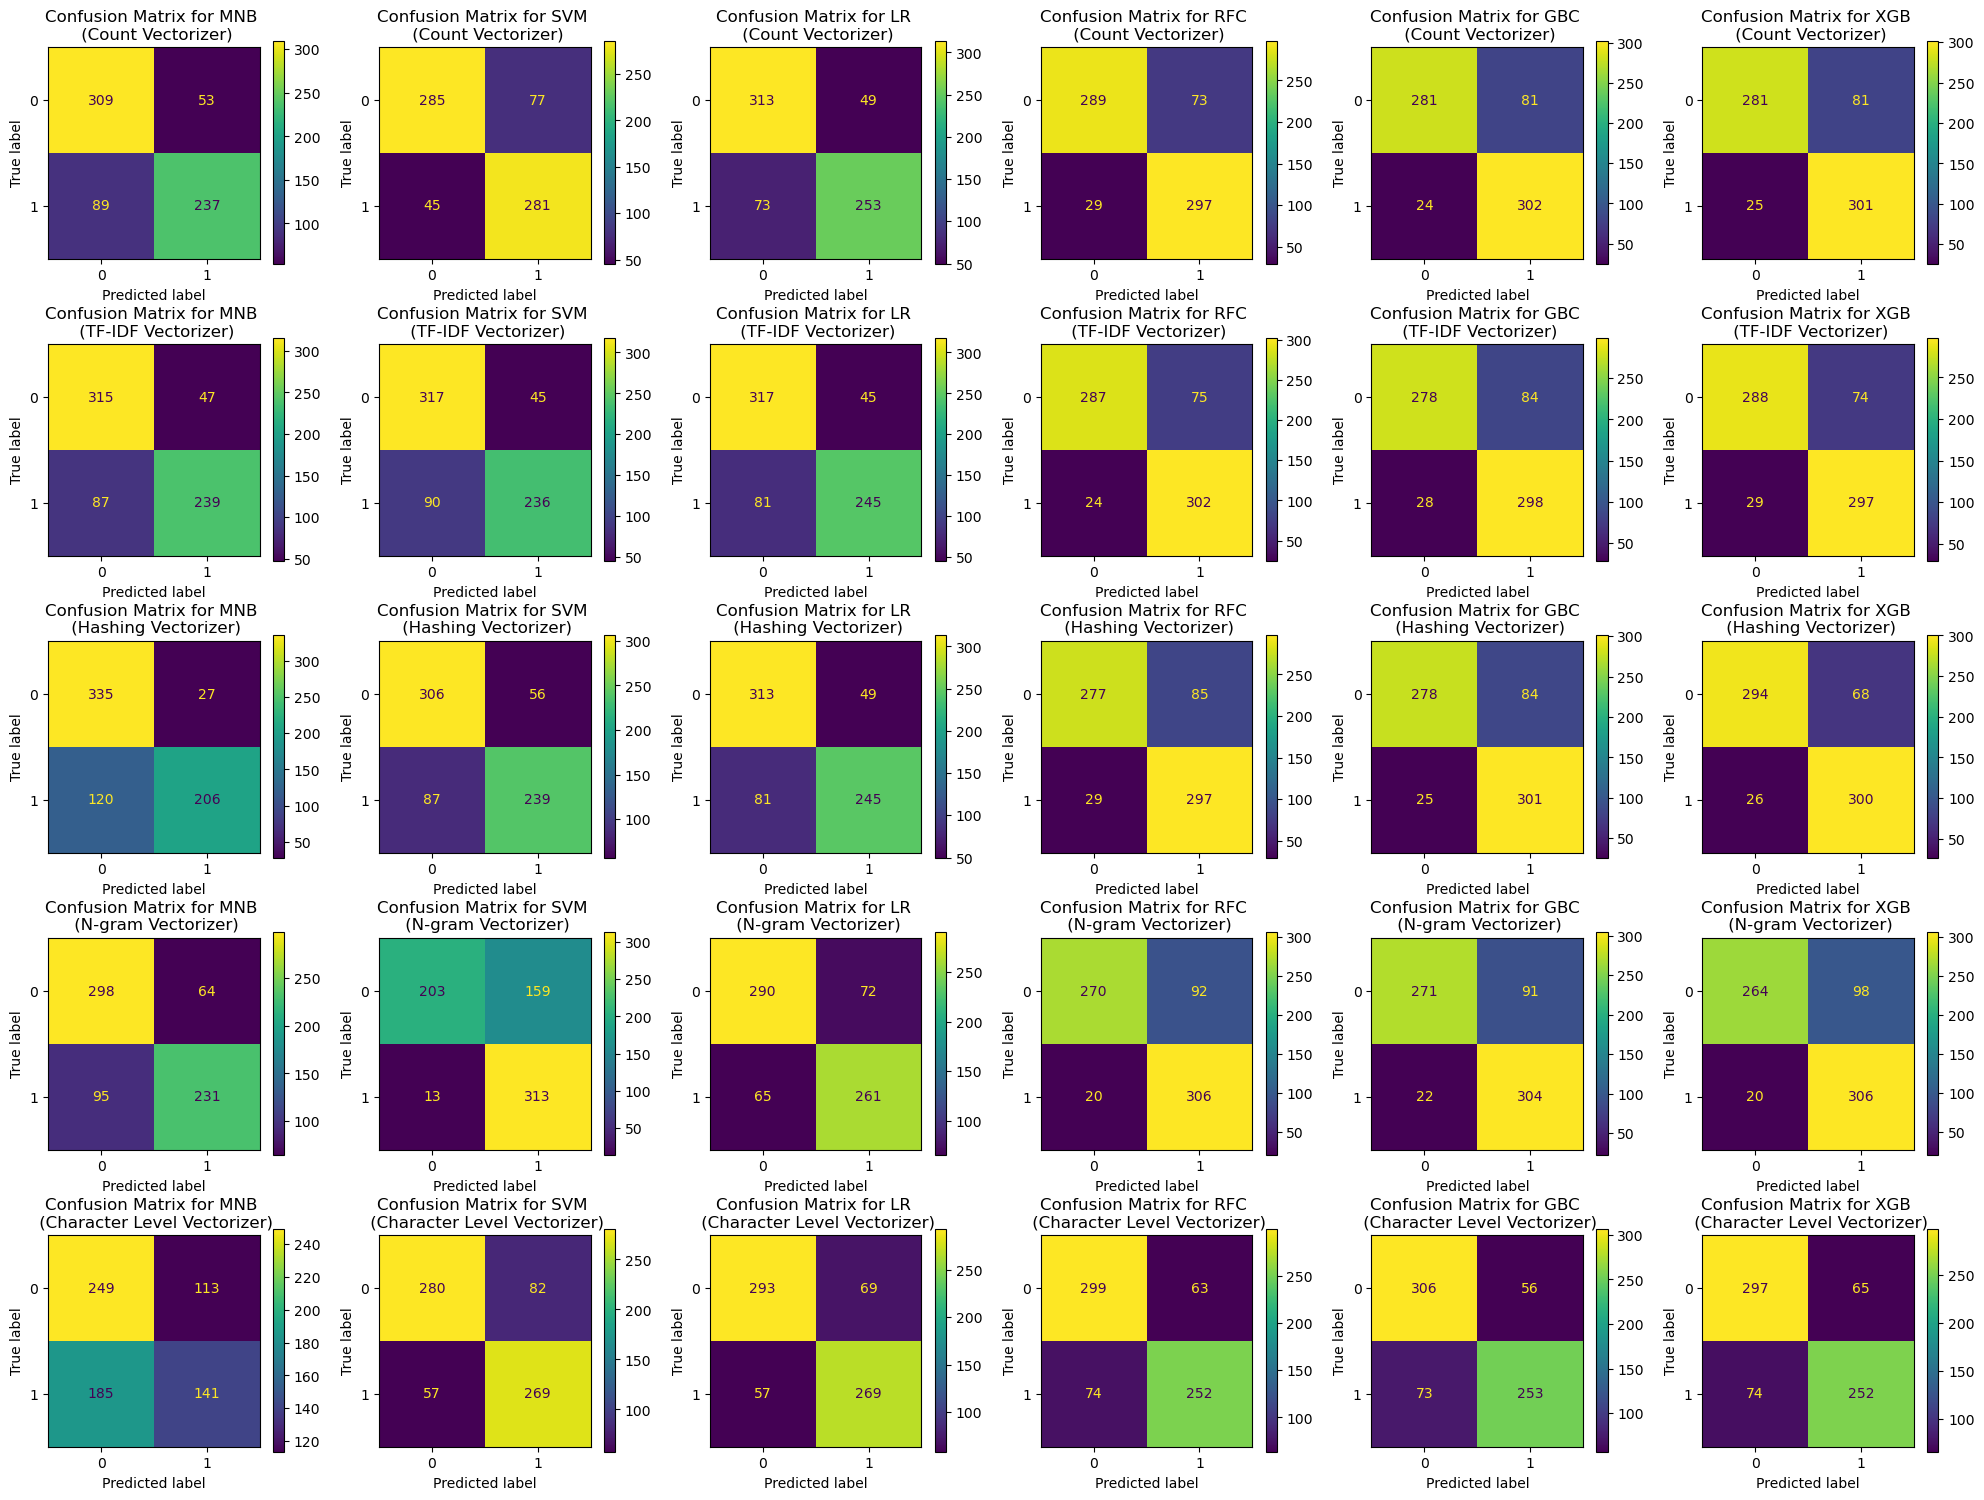

In [755]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay

# Get unique models and vectorizers from grid_results_df
models = grid_results_df['Model'].unique()
vectorizers = grid_results_df['Vectorizer'].unique()

# Create a figure with subplots for confusion matrices
fig, axes = plt.subplots(len(vectorizers),len(models), figsize=(20, 15))

# Loop through each model and vectorizer to plot confusion matrices
for i, vectorizer in enumerate(vectorizers ):
    for j, model in enumerate(models):
        # Filter the results for the current model and vectorizer
        row = grid_results_df[(grid_results_df['Model'] == model) & (grid_results_df['Vectorizer'] == vectorizer)]
        
        if not row.empty:
            # Get the confusion matrix values
            tn, fp, fn, tp = row.iloc[0][['TN', 'FP', 'FN', 'TP']]
            cm = np.array([[tn, fp], [fn, tp]])
            
            # Create confusion matrix display
            
            disp = ConfusionMatrixDisplay(confusion_matrix=cm)
            disp.plot(ax=axes[i, j])
            axes[i, j].set_title(f"Confusion Matrix for {model} \n ({vectorizer})", fontsize=12)  
        else:
            axes[i, j].axis('off')  # Turn off the axis if no data available

# Adjust layout
plt.tight_layout()
plt.show()


In [756]:
best_model_info[model_name] = (accuracy, precision, recall, f1, tn, fp, fn, tp, best_params)


In [779]:
# Assuming each result is a list of 12 items corresponding to the columns
columns = ['Model', 'Vectorizer',  'Accuracy (%)', 'Precision (%)', 
           'Recall (%)', 'F1 Score (%)', 'TN', 'FP', 'FN', 'TP', 'Best Params']

# Create DataFrames
randomized_results_df = pd.DataFrame(randomized_results, columns=columns)
grid_results_df = pd.DataFrame(grid_results, columns=columns)

# Concatenate DataFrames
combined_results_df = pd.concat([randomized_results_df, grid_results_df], ignore_index=True)

In [780]:
top_models = combined_results_df.sort_values(by='F1 Score (%)', ascending=False).head(5)

# Display the top 5 models
top_models

,Model,Vectorizer,Accuracy (%),Precision (%),Recall (%),F1 Score (%),TN,FP,FN,TP,Best Params
47,XGB,Hashing Vectorizer,0.863372,0.869692,0.863372,0.863299,294,68,26,300,"{'classifier__learning_rate': 0.1, 'classifier..."
17,XGB,Hashing Vectorizer,0.863372,0.869692,0.863372,0.863299,294,68,26,300,"{'classifier__n_estimators': 100, 'classifier_..."
9,RFC,TF-IDF Vectorizer,0.857558,0.864998,0.857558,0.857420,290,72,26,300,"{'classifier__n_estimators': 100, 'classifier_..."
3,RFC,Count Vectorizer,0.856105,0.862645,0.856105,0.856013,291,71,28,298,"{'classifier__n_estimators': 200, 'classifier_..."
39,RFC,TF-IDF Vectorizer,0.856105,0.865131,0.856105,0.855872,287,75,24,302,"{'classifier__max_depth': None, 'classifier__n..."


In [377]:
top_models = combined_results_df.sort_values(by='Recall (%)', ascending=False).head(5)

# Display the top 5 models
top_models

,Model,Vectorizer,Accuracy (%),Precision (%),Recall (%),F1 Score (%),TN,FP,FN,TP,Best Params
47,XGB,Hashing Vectorizer,0.863372,0.869692,0.863372,0.863299,294,68,26,300,"{'classifier__learning_rate': 0.1, 'classifier..."
17,XGB,Hashing Vectorizer,0.863372,0.869692,0.863372,0.863299,294,68,26,300,"{'classifier__n_estimators': 100, 'classifier_..."
9,RFC,TF-IDF Vectorizer,0.856105,0.863836,0.856105,0.855947,289,73,26,300,"{'classifier__n_estimators': 200, 'classifier_..."
45,RFC,Hashing Vectorizer,0.854651,0.862678,0.854651,0.854474,288,74,26,300,"{'classifier__max_depth': None, 'classifier__n..."
39,RFC,TF-IDF Vectorizer,0.853198,0.861526,0.853198,0.853000,287,75,26,300,"{'classifier__max_depth': None, 'classifier__n..."


In [378]:
top_models = combined_results_df.sort_values(by='Precision (%)',  ascending=False).head(5)

# Display the top 5 models
top_models

,Model,Vectorizer,Accuracy (%),Precision (%),Recall (%),F1 Score (%),TN,FP,FN,TP,Best Params
17,XGB,Hashing Vectorizer,0.863372,0.869692,0.863372,0.863299,294,68,26,300,"{'classifier__n_estimators': 100, 'classifier_..."
47,XGB,Hashing Vectorizer,0.863372,0.869692,0.863372,0.863299,294,68,26,300,"{'classifier__learning_rate': 0.1, 'classifier..."
9,RFC,TF-IDF Vectorizer,0.856105,0.863836,0.856105,0.855947,289,73,26,300,"{'classifier__n_estimators': 200, 'classifier_..."
45,RFC,Hashing Vectorizer,0.854651,0.862678,0.854651,0.854474,288,74,26,300,"{'classifier__max_depth': None, 'classifier__n..."
39,RFC,TF-IDF Vectorizer,0.853198,0.861526,0.853198,0.853000,287,75,26,300,"{'classifier__max_depth': None, 'classifier__n..."


In [564]:
top_models = combined_results_df.sort_values(by='Accuracy (%)',  ascending=False).head(5)

# Display the top 5 models
top_models

,Model,Vectorizer,Accuracy (%),Precision (%),Recall (%),F1 Score (%),TN,FP,FN,TP,Best Params
47,XGB,Hashing Vectorizer,0.863372,0.869692,0.863372,0.863299,294,68,26,300,"{'classifier__learning_rate': 0.1, 'classifier..."
17,XGB,Hashing Vectorizer,0.863372,0.869692,0.863372,0.863299,294,68,26,300,"{'classifier__n_estimators': 100, 'classifier_..."
9,RFC,TF-IDF Vectorizer,0.856105,0.863836,0.856105,0.855947,289,73,26,300,"{'classifier__n_estimators': 200, 'classifier_..."
45,RFC,Hashing Vectorizer,0.854651,0.862678,0.854651,0.854474,288,74,26,300,"{'classifier__max_depth': None, 'classifier__n..."
39,RFC,TF-IDF Vectorizer,0.853198,0.861526,0.853198,0.853000,287,75,26,300,"{'classifier__max_depth': None, 'classifier__n..."


In [534]:
# Identify the best overall model based on Accuracy
best_overall_model = combined_results_df.loc[combined_results_df['Accuracy (%)'].idxmax()]
print("\nBest Model Based on Accuracy (with hyperparameter) :")
print(best_overall_model)


Best Model Based on Accuracy (with hyperparameter) :
Model                                                          XGB
Vectorizer                                      Hashing Vectorizer
Accuracy (%)                                              0.863372
Precision (%)                                             0.869692
Recall (%)                                                0.863372
F1 Score (%)                                              0.863299
TN                                                             294
FP                                                              68
FN                                                              26
TP                                                             300
Best Params      {'classifier__n_estimators': 100, 'classifier_...
Name: 17, dtype: object


In short:

>The Random Forest Classifier, with an accuracy of 85.90%, is effective in identifying fraudulent reviews without the need for hyperparameter tuning. Its high recall rate of 92.64% indicates that the model is particularly good at detecting true positive cases (genuine fraudulent reviews), while the precision rate of 80.53% shows a balanced performance in minimizing false positives. The overall performance metrics, including the F1 Score of 86.16%, demonstrate the model's reliability in the classification task.

>The XGBoost model, optimized with hyperparameters, provides a robust accuracy of 86.34%, demonstrating its efficacy in distinguishing between fraudulent and genuine reviews. The model's precision and recall values further validate its effectiveness, indicating a balanced performance in identifying positive cases.

